## Alternative gene and constitutive gene select


In [6]:
%load_ext rpy2.ipython

### Fig 4a

In [2]:
import os
import pandas as pd
import pyranges as pr
import numpy as np
import sys
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

def transcript_count(df,key):
    return len(df[key].unique())
def G4_pos_count(df,key):
    return Counter(df[key]).most_common(1)[0][1]
def max_express_select(df):
    def select(tG4):
        tG4info = tG4.iloc[:,:2]
        tG4 = tG4.iloc[:,2:]
        tG4.mask(tG4>1,1,inplace=True)
        tG4.mask(tG4<1,0,inplace=True)
        tG4 = pd.concat([tG4info,tG4],axis=1)
        return tG4
    df1 = df[df["g4type"].isin(["G4"])].groupby("gene_id").agg("max")
    tpG4 = select(df1)
    df2 = df[df["g4type"].isin(["Non"])].groupby("gene_id").agg("max")
    tpnonG4 = select(df2)
    return pd.concat([tpG4,tpnonG4])
def find_g4_prop(df):
    a = Counter(df)
    return a[2]/(a[2]+a[1])

def pqs_classication(row):
    """
    row from pd.Dataframe 
    """
    if row.Strand == row.Strand_b:
        return "GPQS"
    else:
        return "CPQS"
    
datapath = "/disk2/G4_MS/promoter_select/promoter_info"
tssPromoter = pd.read_table(os.path.join(datapath,"promoter.annotion.tsv"))
tssG4 = pd.read_table(os.path.join(datapath,"promoter_pG4.info.tsv"))
tssNonG4 = pd.read_table(os.path.join(datapath,"promoter_nopG4.info.tsv"))
print("promoter pG4s : %s" %tssG4.iloc[:,:7].drop_duplicates().shape[0])
print("promoter GPQS: %s" %tssG4[tssG4["g4_class"] == "GPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("promoter CPQS: %s" %tssG4[tssG4["g4_class"] == "CPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("CPQS & GPQS merged g4 numbers: %s" %tssG4[tssG4["g4_class"] == "GPQS"]
      [tssG4[tssG4["g4_class"] == "GPQS"].apply(lambda x:"|".join(
          [x.Chromosome,str(x.Start),str(x.End)]),axis=1).isin(
          tssG4[tssG4["g4_class"] == "CPQS"].apply(lambda x:"|".join(
              [x.Chromosome,str(x.Start),str(x.End)]),axis=1))].iloc[:,:7].drop_duplicates().shape[0])
print(f"""gene pG4s: {len(set(tssG4.loc[:,"gene_id"]))}""")
print(f"""gene GPQS: {len(set(tssG4[tssG4["g4_class"] == "GPQS"].loc[:,"gene_id"]))}""")
print(f"""gene CPQS: {len(set(tssG4[tssG4["g4_class"] == "CPQS"].loc[:,"gene_id"]))}""")
print(f"""CPQS & GPQS genes: {len(set(tssG4[tssG4["g4_class"] == "CPQS"].loc[:,"gene_id"]
) & set(tssG4[tssG4["g4_class"] == "GPQS"].loc[:,"gene_id"]))}""")

print(f"""pG4s promoter : {len(set(tssG4.loc[:,"Promoter_id"]))}""")
print(f"""GPQS promoter : {len(set(tssG4[tssG4["g4_class"] == "GPQS"].loc[:,"Promoter_id"]))}""")
print(f"""CPQS promoter : {len(set(tssG4[tssG4["g4_class"] == "CPQS"].loc[:,"Promoter_id"]))}""")
print(f"""CPQS & GPQS promoter: {len(set(tssG4[tssG4["g4_class"] == "CPQS"].loc[:,"Promoter_id"]
) & set(tssG4[tssG4["g4_class"] == "GPQS"].loc[:,"Promoter_id"]))}""")
#### chippromoter G4 get
chipG4 = pd.read_table(os.path.join(datapath,"promoter_pG4.info.H3K4me3.tsv"))
chipNonG4 = pd.read_table(os.path.join(datapath,"promoter_nopG4.info.H3K4me3.tsv"))
chipPromoter = pd.read_table(os.path.join(datapath,"promoter_info.annotion.H3K4me3.tsv"))
# chipPromoter = pr.PyRanges(chipPromoter)
# chipNonG4 = chipPromoter.overlap(g4,invert=True)

# gr = g4_100.join(chipPromoter,strandedness=False,report_overlap=True)

# chipG4 =gr.as_df()
# chipG4 = chipG4[chipG4.apply(lambda x:x["Overlap"]/(x["End"]-x["Start"])>0.75,axis=1)]
# chipG4["g4_class"] = chipG4.apply(lambda x:pqs_classication(x),axis=1)
# chipG4.to_csv(os.path.join(datapath,"promoter_pG4.info.H3K4me3.tsv"),sep="\t",index=False)
# chipNonG4.to_csv(path=os.path.join(datapath,"promoter_nopG4.info.H3K4me3.tsv"),sep="\t")
print("###"*10)
print("promoter pG4s : %s" %chipG4.iloc[:,:7].drop_duplicates().shape[0])
print("promoter GPQS: %s" %chipG4[chipG4["g4_class"] == "GPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("promoter CPQS: %s" %chipG4[chipG4["g4_class"] == "CPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("CPQS & GPQS merged g4 numbers: %s" %chipG4[chipG4["g4_class"] == "GPQS"]
      [chipG4[chipG4["g4_class"] == "GPQS"].apply(lambda x:"|".join(
          [x.Chromosome,str(x.Start),str(x.End)]),axis=1).isin(
          chipG4[chipG4["g4_class"] == "CPQS"].apply(lambda x:"|".join(
              [x.Chromosome,str(x.Start),str(x.End)]),axis=1))].iloc[:,:7].drop_duplicates().shape[0])
print(f"""pG4s genes: {len(set(chipG4.loc[:,"gene_id"]))}""")
print(f"""pG4s genes: {len(set(chipG4[chipG4["g4_class"] == "GPQS"].loc[:,"gene_id"]))}""")
print(f"""pG4s genes: {len(set(chipG4[chipG4["g4_class"] == "CPQS"].loc[:,"gene_id"]))}""")
print(f"""CPQS & GPQS genes: {len(set(chipG4[chipG4["g4_class"] == "CPQS"].loc[:,"gene_id"]
) & set(chipG4[chipG4["g4_class"] == "GPQS"].loc[:,"gene_id"]))}""")

print(f"""pG4s promoter : {len(set(chipG4.loc[:,"Promoter_id"]))}""")
print(f"""GPQS Promoter_id: {len(set(chipG4[chipG4["g4_class"] == "GPQS"].loc[:,"Promoter_id"]))}""")
print(f"""CPQS Promoter_id: {len(set(chipG4[chipG4["g4_class"] == "CPQS"].loc[:,"Promoter_id"]))}""")
print(f"""CPQS & GPQS promoter: {len(set(chipG4[chipG4["g4_class"] == "CPQS"].loc[:,"Promoter_id"]
) & set(chipG4[chipG4["g4_class"] == "GPQS"].loc[:,"Promoter_id"]))}""")

###############################gene Number count ####################
## Alternativate gene get
tssAlternativateGene = tssG4[tssG4.gene_id.isin(tssNonG4.gene_id)]
# tssAlternativateGene.loc[:,"transcript_id"] = tssAlternativateGene.loc[:,"transcript_id"].map(lambda x:x.split(".")[0])
chipAlternativateGene = chipG4[chipG4.gene_id.isin(chipNonG4.gene_id)]
# chipAlternativateGene.loc[:,"transcript_id"] = chipAlternativateGene.loc[:,"transcript_id"].map(lambda x:x.split(".")[0])
## nonGene get
tssNonGene = tssNonG4[~tssNonG4.gene_id.isin(tssG4.gene_id)]
chipNonGene = chipNonG4[~chipNonG4.gene_id.isin(chipG4.gene_id)]

## constitutive genes get
preTssContitutiveGene = tssG4[~tssG4.gene_id.isin(tssAlternativateGene.gene_id)]
preTssContitutiveGene.loc[:,"G4_pos"] = preTssContitutiveGene.apply(lambda x: str(x.Chromosome)+"_" + str(x.Start) + "_"+ str(x.End),axis=1)
tssContitutiveGene = pd.DataFrame(preTssContitutiveGene.groupby("gene_id").agg(transcript_count,key="transcript_id").transcript_id).join(pd.DataFrame(preTssContitutiveGene.groupby("gene_id").agg(G4_pos_count,key="G4_pos").G4_pos))

preChipContitutiveGene = chipG4[~chipG4.gene_id.isin(chipAlternativateGene.gene_id)]
preChipContitutiveGene.loc[:,"G4_pos"] = preChipContitutiveGene.apply(lambda x: str(x.Chromosome)+"_" + str(x.Start) + "_"+ str(x.End),axis=1)
chipContitutiveGene =  pd.DataFrame(preChipContitutiveGene.groupby("gene_id").agg(transcript_count,key="transcript_id").transcript_id).join(pd.DataFrame(preChipContitutiveGene.groupby("gene_id").agg(G4_pos_count,key="G4_pos").G4_pos))

# alternativate geneinfo count
print("tss all genes number: %s" %len(tssPromoter.gene_id.unique()))
print("tss Alternativate genes number %s" %len(tssAlternativateGene.gene_id.unique()))
print("tss NonG4 genes number %s" %len(tssNonGene.gene_id.unique()))
print("tss constitutivate all gene number %s" %tssContitutiveGene.shape[0])
print("tss constitutivate same gene numbers  %s " %tssContitutiveGene[tssContitutiveGene.transcript_id == tssContitutiveGene.G4_pos].shape[0])
print("tss constitutivate alter gene numbers  %s " %tssContitutiveGene[tssContitutiveGene.transcript_id != tssContitutiveGene.G4_pos].shape[0])

print("#####")
print("Chip all genes number: %s" %len(chipPromoter.gene_id.unique()))
print("Chip Alternativate genes number %s" %len(chipAlternativateGene.gene_id.unique()))
print("Chip NonG4 genes number %s" %len(chipNonGene.gene_id.unique()))
print("chip constitutivate all gene number %s" %chipContitutiveGene.shape[0])
print("chip constitutivate same gene numbers  %s " %chipContitutiveGene[chipContitutiveGene.transcript_id == chipContitutiveGene.G4_pos].shape[0])
print("chip constitutivate alter gene numbers  %s " %chipContitutiveGene[chipContitutiveGene.transcript_id != chipContitutiveGene.G4_pos].shape[0])

wdpath = "/disk2/G4_MS/transcript/genes"
os.chdir(wdpath)
gte_path = "/disk2/G4_MS/transcript/genes/data/GTEX_transcript_median.tsv"
gte = pd.read_table(gte_path)
gte["sample"] = gte["sample"].map(lambda x: x.split(".")[0])

tssTpG4 = tssAlternativateGene.loc[:,["transcript_id","gene_id"]].drop_duplicates()
tssTpG4.loc[:,"g4type"] = "G4"
# tssNonG4 = tssNonG4.as_df()
tssTpNonG4 = tssNonG4[tssNonG4.gene_id.isin(tssAlternativateGene.gene_id)].loc[:,["transcript_id","gene_id"]].drop_duplicates()
tssTpNonG4.loc[:,"g4type"] = "Non"
tssTpAlternativateGene = pd.concat([tssTpG4,tssTpNonG4])
tssTpAlternativateGene.loc[:,"transcript_id"] = tssTpAlternativateGene.loc[:,"transcript_id"].map(lambda x:x.split(".")[0])
tssTpAlternativateGene = tssTpAlternativateGene.merge(gte,left_on="transcript_id",right_on="sample")
tssTpAlternativateGene = tssTpAlternativateGene.drop("sample",axis=1)

ptssMarkedAlternativateGene = max_express_select(tssTpAlternativateGene)
tssMarkedAlternativateGene = ptssMarkedAlternativateGene.groupby("gene_id").agg(sum)
tssMarkedAlternativateGene = pd.DataFrame(tssMarkedAlternativateGene.apply(lambda x : find_g4_prop(x)),columns=["bothprop"])
tssMarkedAlternativateGene.loc[:,"group"] = "Promoter"
tssMarkedAlternativateGene.loc[:,"Tissue"] = tssMarkedAlternativateGene.index
tss_oneExpress_g4_prop = []
for col in ptssMarkedAlternativateGene.columns[2:]:
    ucol = ["g4type"]
    ucol += [col]
    df = ptssMarkedAlternativateGene.loc[:,ucol]
    a = df.groupby("gene_id").agg(sum)
    a2 = a[a.loc[:,col].isin([2])].index
    df = df[~df.index.isin(a2)]
    tt = df.groupby("g4type").agg(sum)
    tss_oneExpress_g4_prop.append((col,tt.loc["G4",col],(tt.loc["Non",col])))
tss_oneExpress_g4_prop = pd.DataFrame(tss_oneExpress_g4_prop,columns=["Tissue","G4number","NonG4number"])
chipTpG4 = chipAlternativateGene.loc[:,["transcript_id","gene_id"]].drop_duplicates()
chipTpG4.loc[:,"g4type"] = "G4"

chipTpNonG4 = chipNonG4[chipNonG4.gene_id.isin(chipAlternativateGene.gene_id)].loc[:,["transcript_id","gene_id"]].drop_duplicates()
chipTpNonG4.loc[:,"g4type"] = "Non"
chipTpAlternativateGene = pd.concat([chipTpG4,chipTpNonG4])
chipTpAlternativateGene.loc[:,"transcript_id"] = chipTpAlternativateGene.loc[:,"transcript_id"].map(lambda x:x.split(".")[0])
chipTpAlternativateGene = chipTpAlternativateGene.merge(gte,left_on="transcript_id",right_on="sample")
chipTpAlternativateGene = chipTpAlternativateGene.drop("sample",axis=1)


pchipMarkedAlternativateGene = max_express_select(chipTpAlternativateGene)
chipMarkedAlternativateGene = pchipMarkedAlternativateGene.groupby("gene_id").agg(sum)
chipMarkedAlternativateGene = pd.DataFrame(chipMarkedAlternativateGene.apply(lambda x : find_g4_prop(x)),columns=["bothprop"])
chipMarkedAlternativateGene.loc[:,"group"] = "Active promoter"
chipMarkedAlternativateGene.loc[:,"Tissue"] = chipMarkedAlternativateGene.index
chip_oneExpress_g4_prop = []
for col in pchipMarkedAlternativateGene.columns[2:]:
    ucol = ["g4type"]
    ucol += [col]
    df = pchipMarkedAlternativateGene.loc[:,ucol]
    a = df.groupby("gene_id").agg(sum)
    a2 = a[a.loc[:,col].isin([2])].index
    df = df[~df.index.isin(a2)]
    tt = df.groupby("g4type").agg(sum)
    chip_oneExpress_g4_prop.append((col,tt.loc["G4",col],(tt.loc["Non",col])))
chip_oneExpress_g4_prop = pd.DataFrame(chip_oneExpress_g4_prop,columns=["Tissue","G4number","NonG4number"])

chipMarkedAlternativateGene.loc[:,"Tissue"] = chipMarkedAlternativateGene.index
MarkedAlternativateGene = pd.concat([chipMarkedAlternativateGene,tssMarkedAlternativateGene])
chip_oneExpress_g4_prop.loc[:,"group"] = "Active promoter"
tss_oneExpress_g4_prop.loc[:,"group"] = "Promoter"
oneExpress_g4_prop = pd.concat([chip_oneExpress_g4_prop,tss_oneExpress_g4_prop])

promoter pG4s : 38680
promoter GPQS: 20443
promoter CPQS: 19530
CPQS & GPQS merged g4 numbers: 1293
gene pG4s: 13657
gene GPQS: 10009
gene CPQS: 10008
CPQS & GPQS genes: 6360
pG4s promoter : 24826
GPQS promoter : 17133
CPQS promoter : 17149
CPQS & GPQS promoter: 9456
##############################
promoter pG4s : 16035
promoter GPQS: 8904
promoter CPQS: 7905
CPQS & GPQS merged g4 numbers: 774
pG4s genes: 9510
pG4s genes: 6334
pG4s genes: 5800
CPQS & GPQS genes: 2624
pG4s promoter : 10730
GPQS Promoter_id: 6942
CPQS Promoter_id: 6266
CPQS & GPQS promoter: 2478
tss all genes number: 19955
tss Alternativate genes number 3865
tss NonG4 genes number 6184
tss constitutivate all gene number 9792
tss constitutivate same gene numbers  8206 
tss constitutivate alter gene numbers  1586 
#####
Chip all genes number: 16119
Chip Alternativate genes number 2534
Chip NonG4 genes number 6032
chip constitutivate all gene number 6976
chip constitutivate same gene numbers  6163 
chip constitutivate alter 

meta NOT subset; don't know how to subset; dropped


<Figure size 800x800 with 0 Axes>

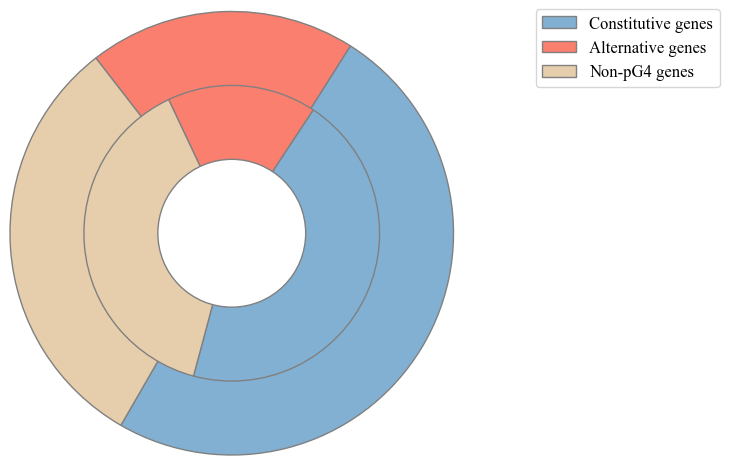

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import colorbm as cbm

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
plt.rcParams['font.sans-serif']=['Times New Roman']

# sns.set_context("paper")
# sns.set(style="ticks", context="paper",rc={'font.sans-serif':['Times New Roman']})
font1 = {'family':'Times New Roman',
'weight' : 'normal',
'size'   : 12,
        }

df1 = [9792, 3865, 6184]
df2 = [6976, 2534, 6032]
df0 = [0,0,1]
labels = ["Constitutive genes","Alternative genes","Non-pG4 genes"]
colors = ["#82B0D2","#FA7F6F","#E6CEAC"]


plt.figure(figsize=(8,8))
fig,ax = plt.subplots()
pie1 = ax.pie(df1,startangle = -120, radius=1.5, pctdistance =0.9, colors=colors)
pie2 = ax.pie(df2,startangle = -105, radius=1, pctdistance =0.9, colors=colors)
pie0 = ax.pie(df0,radius=0.5,colors="w")

# ax.text(0.1, 2.1, "")
for pie_wedge in pie1[0]:
    pie_wedge.set_edgecolor('gray')
for pie_wedge in pie2[0]:
    pie_wedge.set_edgecolor('gray')
for pie_wedge in pie0[0]:
    pie_wedge.set_edgecolor('gray')
ax.legend(labels, bbox_to_anchor=(1.3,1.0), loc='center left', prop=font1)
plt.savefig("/disk2/G4_MS/transcript/genes/analysis/Constitutive_Alternativate_genes.pdf")
plt.show()

## Fig 4b

## Tissue Specific && Cancer Associated
### data were download from paper '''A Pan-cancer Transcriptome Analysis Reveals Pervasive Regulation through Alternative Promoters'''
##### using liftover trans hg19 to hg38

In [5]:
import os
wdpath = "/disk2/G4_MS/transcript/promoter_activity_alternative"
with open(os.path.join(wdpath,"genecode.hg19.annotion.promoter.tsv"))as fr,open(os.path.join(wdpath,"genecode.hg19.annotion.promoter.fix.bed"),'w') as fw:
    for line in fr:
        if line.startswith("chr"):
            uline = line.strip().split("\t")
            # ['chrX', '99891803', '99891803', '1', '-', 'prmtr.1', 'ENSG00000000003.10', 'FALSE']
            uline[2] = str(int(uline[2])+1)
            uline[6] = uline[6].split(".")[0]
            fw.write("\t".join(uline[:3]+[uline[5],uline[6],uline[4]])+"\n")

## promoter and gene infomation obtained 

In [10]:
import pandas as pd
import pyranges as pr
import os 
from collections import Counter

def pqs_classication(row):
    """
    row from pd.Dataframe 
    """
    if row.Strand == row.Strand_b:
        return "GPQS"
    else:
        return "CPQS"

wdpath = "/disk2/G4_MS/transcript/promoter_activity_alternative"
prmtr_annotion = pr.read_bed(os.path.join(wdpath,"genecode.hg38.annotion.promoter.bed"))
prmtr_annotion = prmtr_annotion.as_df()
prmtr_G4 = pd.read_table("/disk2/G4_MS/promoter_select/promoter_info/promoter_pG4.info.tsv")
prmtr_G4.loc[:,"gene_id"] = prmtr_G4["gene_id"].map(lambda x:x.split(".")[0])
prmtr_eG4 = pd.read_table("/disk2/G4_MS/promoter_select/promoter_info/promoter_pG4.info.H3K4me3.tsv")
prmtr_eG4.loc[:,"gene_id"] = prmtr_eG4["gene_id"].map(lambda x:x.split(".")[0])

prmtr_annotion_relation = pd.read_table(os.path.join(wdpath,"genocode.hg19.transcript_gene_id_promoter.tsv"))
prmtr_annotion_relation.loc[:,"geneId"] = prmtr_annotion_relation["geneId"].map(lambda x:x.split(".")[0])
prmtr_annotion = pr.PyRanges(prmtr_annotion.merge(prmtr_annotion_relation,left_on="Name",right_on="promoterId"))
#
promoter_ori_annotion = pd.read_table("/disk2/G4_MS/promoter_select/promoter_info/promoter.annotion.tsv")
promoter_ori_annotion.loc[:,"gene_id"] = promoter_ori_annotion["gene_id"].map(lambda x:x.split(".")[0])
prmtr_G4 = pr.PyRanges(prmtr_G4)
### prmtr protein coding gene select 
prmtr_annotion_protein = prmtr_annotion[prmtr_annotion.geneId.isin(promoter_ori_annotion["gene_id"])]

promoter = pr.read_bed("/disk2/G4_MS/promoter_select/data/Promoter_encodeCcreCombined.bed")
prmtr_annotion_protein_h3k4me3 = prmtr_annotion_protein.k_nearest(promoter,k=10)
prmtr_annotion_protein_h3k4me3 = prmtr_annotion_protein_h3k4me3[(prmtr_annotion_protein_h3k4me3.Distance <= 0) & (prmtr_annotion_protein_h3k4me3.Distance >= -200)].as_df()
prmtr_annotion_protein_h3k4me3 = prmtr_annotion_protein_h3k4me3.loc[:,['Chromosome', 'Start', 'End', 'Strand', 'geneId', 
               'transcriptId', 'Start_b', 'End_b', 'Name', 'Distance']]
prmtr_annotion_protein_h3k4me3.columns=['Chromosome', 'Start_tss', 'End_tss', 'Strand', 'geneId', 
            'transcriptId', 'Start', 'End', 'Promoter_id', 'Distance']

prmtr_annotion_protein_h3k4me3 = prmtr_annotion_protein_h3k4me3[['Chromosome', 'Start', 'End','Promoter_id', 'geneId',  'Strand', 'transcriptId','Start_tss', 'End_tss','Distance']]
prmtr_annotion_protein_h3k4me3.to_csv(os.path.join(wdpath,"promoter_info.annotion.H3K4me3.tsv"),sep="\t",index=False)

### prmtr_annotion_protein
prmtr_annotion_protein = prmtr_annotion_protein.slack({"5":1000})
prmtr_annotion_protein = prmtr_annotion_protein.as_df()
prmtr_annotion_protein = prmtr_annotion_protein.loc[:,['Chromosome','Start', 'End', 'promoterId', 'geneId','Strand', 'transcriptId']]
prmtr_annotion_protein.to_csv(os.path.join(wdpath,"promoter.annotion.tsv"),sep="\t",index=False)
#################
g4_path = "/disk2/G4_MS/G4_identify/Quadron"
g4 = pr.PyRanges(pd.read_table(os.path.join(g4_path,"hs38d2.quadron.bed"),header=None,names=['Chromosome', 'Start', 'End', 'Name', 'G4_length', 'Strand', 'Score']))
prmtr_annotion_protein = pr.PyRanges(prmtr_annotion_protein)
promoter_nopG4_protein = prmtr_annotion_protein.overlap(g4,invert=True)
gr = g4.join(prmtr_annotion_protein,strandedness=False,report_overlap=True)
promoter_pG4_protein =gr.as_df()
promoter_pG4_protein = promoter_pG4_protein[promoter_pG4_protein.apply(lambda x:x["Overlap"]/(x["End"]-x["Start"])>0.75,axis=1)]
promoter_pG4_protein["g4_class"] = promoter_pG4_protein.apply(lambda x:pqs_classication(x),axis=1)
promoter_pG4_protein.to_csv(os.path.join(wdpath,"promoter_pG4.info.tsv"),sep="\t",index=False)
promoter_nopG4_protein.to_csv(path=os.path.join(wdpath,"promoter_nopG4.info.tsv"),sep="\t")
print("promoter pG4s : %s" %promoter_pG4_protein.iloc[:,:7].drop_duplicates().shape[0])
print("promoter GPQS: %s" %promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "GPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("promoter CPQS: %s" %promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "CPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("CPQS & GPQS merged g4 numbers: %s" %promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "GPQS"]
      [promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "GPQS"].apply(lambda x:"|".join(
          [x.Chromosome,str(x.Start),str(x.End)]),axis=1).isin(
          promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "CPQS"].apply(lambda x:"|".join(
              [x.Chromosome,str(x.Start),str(x.End)]),axis=1))].iloc[:,:7].drop_duplicates().shape[0])
print(f"""gene pG4s: {len(set(promoter_pG4_protein.loc[:,"geneId"]))}""")
print(f"""gene GPQS: {len(set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "GPQS"].loc[:,"geneId"]))}""")
print(f"""gene CPQS: {len(set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "CPQS"].loc[:,"geneId"]))}""")
print(f"""CPQS & GPQS genes: {len(set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "CPQS"].loc[:,"geneId"]
) & set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "GPQS"].loc[:,"geneId"]))}""")

print(f"""pG4s promoter : {len(set(promoter_pG4_protein.loc[:,"promoterId"]))}""")
print(f"""GPQS promoter : {len(set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "GPQS"].loc[:,"promoterId"]))}""")
print(f"""CPQS promoter : {len(set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "CPQS"].loc[:,"promoterId"]))}""")
print(f"""CPQS & GPQS promoter: {len(set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "CPQS"].loc[:,"promoterId"]
) & set(promoter_pG4_protein[promoter_pG4_protein["g4_class"] == "GPQS"].loc[:,"promoterId"]))}""")
###########################
g4 = pr.PyRanges(pd.read_table(os.path.join(g4_path,"hs38d2.quadron.bed"),header=None,names=['Chromosome', 'Start', 'End', 'Name', 'G4_length', 'Strand', 'Score']))
prmtr_annotion_protein_h3k4me3 = pr.PyRanges(prmtr_annotion_protein_h3k4me3)
promoter_nopG4_protein_h3k4me3 = prmtr_annotion_protein_h3k4me3.overlap(g4,invert=True)

g4 = g4[g4.G4_length < 100]
gr = g4.join(prmtr_annotion_protein_h3k4me3,strandedness=False,report_overlap=True)

promoter_pG4_protein_h3k4me3 =gr.as_df()
promoter_pG4_protein_h3k4me3 = promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3.apply(lambda x:x["Overlap"]/(x["End"]-x["Start"])>0.75,axis=1)]
promoter_pG4_protein_h3k4me3["g4_class"] = promoter_pG4_protein_h3k4me3.apply(lambda x:pqs_classication(x),axis=1)
promoter_pG4_protein_h3k4me3.to_csv(os.path.join(wdpath,"promoter_pG4.info.H3K4me3.tsv"),sep="\t",index=False)
promoter_nopG4_protein_h3k4me3.to_csv(path=os.path.join(wdpath,"promoter_nopG4.info.H3K4me3.tsv"),sep="\t")
print("###"*10)
print("promoter pG4s : %s" %promoter_pG4_protein_h3k4me3.iloc[:,:7].drop_duplicates().shape[0])
print("promoter GPQS: %s" %promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "GPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("promoter CPQS: %s" %promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "CPQS"].iloc[:,:7].drop_duplicates().shape[0])
print("CPQS & GPQS merged g4 numbers: %s" %promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "GPQS"]
      [promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "GPQS"].apply(lambda x:"|".join(
          [x.Chromosome,str(x.Start),str(x.End)]),axis=1).isin(
          promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "CPQS"].apply(lambda x:"|".join(
              [x.Chromosome,str(x.Start),str(x.End)]),axis=1))].iloc[:,:7].drop_duplicates().shape[0])
print(f"""pG4s genes: {len(set(promoter_pG4_protein_h3k4me3.loc[:,"geneId"]))}""")
print(f"""pG4s genes: {len(set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "GPQS"].loc[:,"geneId"]))}""")
print(f"""pG4s genes: {len(set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "CPQS"].loc[:,"geneId"]))}""")
print(f"""CPQS & GPQS genes: {len(set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "CPQS"].loc[:,"geneId"]
) & set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "GPQS"].loc[:,"geneId"]))}""")

print(f"""pG4s promoter : {len(set(promoter_pG4_protein_h3k4me3.loc[:,"Promoter_id"]))}""")
print(f"""GPQS Promoter_id: {len(set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "GPQS"].loc[:,"Promoter_id"]))}""")
print(f"""CPQS Promoter_id: {len(set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "CPQS"].loc[:,"Promoter_id"]))}""")
print(f"""CPQS & GPQS promoter: {len(set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "CPQS"].loc[:,"Promoter_id"]
) & set(promoter_pG4_protein_h3k4me3[promoter_pG4_protein_h3k4me3["g4_class"] == "GPQS"].loc[:,"Promoter_id"]))}""")

promoter pG4s : 58996
promoter GPQS: 31664
promoter CPQS: 28966
CPQS & GPQS merged g4 numbers: 1634
gene pG4s: 14053
gene GPQS: 11012
gene CPQS: 10994
CPQS & GPQS genes: 7953
pG4s promoter : 31241
GPQS promoter : 21694
CPQS promoter : 20612
CPQS & GPQS promoter: 11065
##############################
promoter pG4s : 15027
promoter GPQS: 8416
promoter CPQS: 7461
CPQS & GPQS merged g4 numbers: 850
pG4s genes: 9129
pG4s genes: 6001
pG4s genes: 5528
CPQS & GPQS genes: 2400
pG4s promoter : 11310
GPQS Promoter_id: 7194
CPQS Promoter_id: 6369
CPQS & GPQS promoter: 2253


##  the numbers of alternative promoter activity promoter_id were obtained for Fisher test  

In [14]:
def promoter_id_count(promoter_pG4_protein, promoter_nopG4_protein, df, key, tmp, pG4=True):
    if pG4:
        tmp +="1kb promoter\t"
        tmp += key
        tmp += "\t"
        tmp += str(promoter_pG4_protein[promoter_pG4_protein["promoterId"].isin(df["promoterId"])].promoterId.drop_duplicates().shape[0])
        tmp += "\t"
        tmp += str(promoter_pG4_protein[~promoter_pG4_protein["promoterId"].isin(df["promoterId"])].promoterId.drop_duplicates().shape[0])
        tmp += "\t"
        tmp += str(len(set(promoter_nopG4_protein[promoter_nopG4_protein.promoterId.isin(df["promoterId"])].promoterId)))
        tmp += "\t"
        tmp += str(len(set(promoter_nopG4_protein[~promoter_nopG4_protein.promoterId.isin(df["promoterId"])].promoterId)))
        tmp += "\n"
    else:
        tmp += "0.2kb promoter\t"
        tmp += key
        tmp += "\t"

        tmp += str(promoter_pG4_protein[promoter_pG4_protein["Promoter_id"].isin(df["promoterId"])].Promoter_id.drop_duplicates().shape[0])
        tmp += "\t"
        tmp += str(promoter_pG4_protein[~promoter_pG4_protein["Promoter_id"].isin(df["promoterId"])].Promoter_id.drop_duplicates().shape[0])
        tmp += "\t"
        tmp += str(len(set(promoter_nopG4_protein[promoter_nopG4_protein.Promoter_id.isin(df["promoterId"])].Promoter_id)))
        tmp += "\t"
        tmp += str(len(set(promoter_nopG4_protein[~promoter_nopG4_protein.Promoter_id.isin(df["promoterId"])].Promoter_id)))
        tmp += "\n"
    return tmp      


tissue_specific_alterPromoter = pd.read_excel(os.path.join(wdpath,"cell_supplentaryTable.xlsx"),sheet_name="Tissue Specific")
cancer_associated_alterPromoter  = pd.read_excel(os.path.join(wdpath,"cell_supplentaryTable.xlsx"),sheet_name="Cancer Associated")
multi_cancer_associated_alterPromoter = pd.read_excel(os.path.join(wdpath,"cell_supplentaryTable.xlsx"),sheet_name="Multi cancer Associated")
BRCA_Subtype_specific_alterPromoter = pd.read_excel(os.path.join(wdpath,"cell_supplentaryTable.xlsx"),sheet_name="BRCA Subtype Specific")
pan_cancer_associated_alterPromoter = pd.read_excel(os.path.join(wdpath,"cell_supplentaryTable.xlsx"),sheet_name="Pan-cancer Associated")

tmp = ""
with open(os.path.join(wdpath,"alnative_promoter_activate_count.tsv"),'w')as fw:
    fw.write("promoter_class\tgroup\talternativePromoter_G4Promoter\tnonAlternativepromoter_G4Promoter\talternativePromoter_NonG4Promoter\tnonAlternativePromoter_NonG4Promoter\n")
    fw.write(promoter_id_count(promoter_pG4_protein, promoter_nopG4_protein, tissue_specific_alterPromoter, "Tissue specific", tmp, pG4=True))
    fw.write(promoter_id_count(promoter_pG4_protein_h3k4me3, promoter_nopG4_protein_h3k4me3, tissue_specific_alterPromoter, "Tissue specific", tmp, pG4=False))

    fw.write(promoter_id_count(promoter_pG4_protein, promoter_nopG4_protein, cancer_associated_alterPromoter, "Cancer associated", tmp, pG4=True))
    fw.write(promoter_id_count(promoter_pG4_protein_h3k4me3, promoter_nopG4_protein_h3k4me3, cancer_associated_alterPromoter, "Cancer associated", tmp, pG4=False))

    fw.write(promoter_id_count(promoter_pG4_protein, promoter_nopG4_protein, multi_cancer_associated_alterPromoter, "Multi-cancer associated", tmp, pG4=True))
    fw.write(promoter_id_count(promoter_pG4_protein_h3k4me3, promoter_nopG4_protein_h3k4me3, multi_cancer_associated_alterPromoter, "Multi-cancer associated", tmp, pG4=False))

    fw.write(promoter_id_count(promoter_pG4_protein, promoter_nopG4_protein, BRCA_Subtype_specific_alterPromoter, "BRCA subtype specific", tmp, pG4=True))
    fw.write(promoter_id_count(promoter_pG4_protein_h3k4me3, promoter_nopG4_protein_h3k4me3, BRCA_Subtype_specific_alterPromoter, "BRCA subtype specific", tmp, pG4=False))

    fw.write(promoter_id_count(promoter_pG4_protein, promoter_nopG4_protein, pan_cancer_associated_alterPromoter, "Pan-cancer associated", tmp, pG4=True))
    fw.write(promoter_id_count(promoter_pG4_protein_h3k4me3, promoter_nopG4_protein_h3k4me3, pan_cancer_associated_alterPromoter, "Pan-cancer associated", tmp, pG4=False))


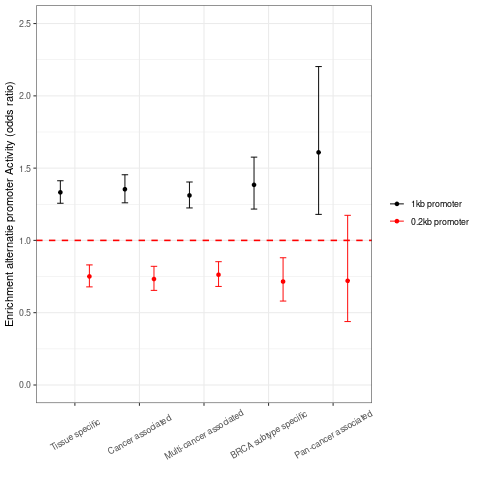

In [18]:
%%R
library("dplyr")
library("ggplot2")
setwd("/disk2/G4_MS/transcript/promoter_activity_alternative")
df <- read.csv("alnative_promoter_activate_count.tsv",sep="\t")
for(i in 1:nrow(df)){
    Fisher_result=fisher.test(matrix(c(df[i,"alternativePromoter_G4Promoter"],df[i,"nonAlternativepromoter_G4Promoter"],
                                                df[i,"alternativePromoter_NonG4Promoter"],df[i,"nonAlternativePromoter_NonG4Promoter"]),
                                              nrow = 2,ncol = 2,byrow = F))
    df[i,"down_95_percentage"] = Fisher_result$conf.int[1]
    df[i,"up_95_percentage"]=Fisher_result$conf.int[2]
    df[i,"odds_ratio"]=Fisher_result$estimate[1]
    df[i,"p_value"]=Fisher_result$p.value
}
df$group <- factor(df$group,level=c("Tissue specific","Cancer associated","Multi-cancer associated","BRCA subtype specific","Pan-cancer associated"))
df$promoter_class <- factor(df$promoter_class,level = c("1kb promoter","0.2kb promoter"))
ggplot(df,aes(x=group,y=odds_ratio,color=promoter_class,fill=promoter_class))+ geom_point(size = 1.5, position = position_dodge(0.9))+
    geom_errorbar(aes(ymin=down_95_percentage,ymax=up_95_percentage),width = 0.2, alpha = 0.9, size = 0.5,position = position_dodge(0.9))+
    geom_hline(yintercept = 1, color = 'red', lty = 2, lwd = 0.75)+
    theme_bw() + labs(fill="",color="")+
    theme(axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5))+
    ylab("Enrichment alternatie promoter Activity (odds ratio)") +  scale_color_manual(values=c("black", "red")) +
    ylim(0.0,2.5) + xlab('')
# ggsave("alternativePromoterAxtivity_G4.pdf")

## Fig 4c


In [21]:
import os
import pandas as pd
import pyranges as pr
import numpy as np
import sys
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

def find_g4_prop(df):
    a = Counter(df)
    return a[2]/(a[2]+a[1])

def max_express_select(df):
    def select(tG4):
        tG4info = tG4.iloc[:,:2]
        tG4 = tG4.iloc[:,2:]
        tG4.mask(tG4>1,1,inplace=True)
        tG4.mask(tG4<1,0,inplace=True)
        tG4 = pd.concat([tG4info,tG4],axis=1)
        return tG4
    df1 = df[df["g4type"].isin(["G4"])].groupby("gene_id").agg("max")
    tpG4 = select(df1)
    df2 = df[df["g4type"].isin(["Non"])].groupby("gene_id").agg("max")
    tpnonG4 = select(df2)
    return pd.concat([tpG4,tpnonG4])

wdpath = "/disk2/G4_MS/transcript/genes"
os.chdir(wdpath)
gte_path = "/disk2/G4_MS/transcript/genes/data/GTEX_transcript_median.tsv"
gte = pd.read_table(gte_path)
gte["sample"] = gte["sample"].map(lambda x: x.split(".")[0])

datapath = "/disk2/G4_MS/transcript/genes/data"
tssG4 = pd.read_table(os.path.join(datapath,"promoter_pG4.info.tsv"))
tssNonG4 =pd.read_table(os.path.join(datapath,"promoter_nopG4.info.tsv"))

chipG4 = pd.read_table(os.path.join(datapath,"promoter_pG4.info.H3K4me3.tsv")) 
chipNonG4 =pd.read_table(os.path.join(datapath,"promoter_nopG4.info.H3K4me3.tsv"))

tssAlternativateGene = tssG4[tssG4.gene_id.isin(tssNonG4.gene_id)]


tssTpG4 = tssAlternativateGene.loc[:,["transcript_id","gene_id"]].drop_duplicates()
tssTpG4.loc[:,"g4type"] = "G4"

tssTpNonG4 = tssNonG4[tssNonG4.gene_id.isin(tssAlternativateGene.gene_id)].loc[:,["transcript_id","gene_id"]].drop_duplicates()
tssTpNonG4.loc[:,"g4type"] = "Non"
tssTpAlternativateGene = pd.concat([tssTpG4,tssTpNonG4])
tssTpAlternativateGene.loc[:,"transcript_id"] = tssTpAlternativateGene.loc[:,"transcript_id"].map(lambda x:x.split(".")[0])
tssTpAlternativateGene = tssTpAlternativateGene.merge(gte,left_on="transcript_id",right_on="sample")
tssTpAlternativateGene = tssTpAlternativateGene.drop("sample",axis=1)

ptssMarkedAlternativateGene = max_express_select(tssTpAlternativateGene)
tssMarkedAlternativateGene = ptssMarkedAlternativateGene.groupby("gene_id").agg(sum)
tssMarkedAlternativateGene = pd.DataFrame(tssMarkedAlternativateGene.apply(lambda x : find_g4_prop(x)),columns=["bothprop"])
tssMarkedAlternativateGene.loc[:,"group"] = "Promoter"
tssMarkedAlternativateGene.loc[:,"Tissue"] = tssMarkedAlternativateGene.index
tss_Express_g4_prop = []
for col in ptssMarkedAlternativateGene.columns[2:]:
    ucol = ["g4type"]
    ucol += [col]
    df = ptssMarkedAlternativateGene.loc[:,ucol]
    a = df.groupby("gene_id").agg(sum)
    a2 = a[a.loc[:,col].isin([2])].index
    df = df[~df.index.isin(a2)]
    tt = df.groupby("g4type").agg(sum)
    tss_Express_g4_prop.append((col,tt.loc["G4",col]+len(a2),(tt.loc["Non",col])))
tss_Express_g4_prop = pd.DataFrame(tss_Express_g4_prop,columns=["Tissue","G4number","NonG4number"])

chipTpG4 = chipAlternativateGene.loc[:,["transcript_id","gene_id"]].drop_duplicates()
chipTpG4.loc[:,"g4type"] = "G4"
chipTpNonG4 = chipNonG4[chipNonG4.gene_id.isin(chipAlternativateGene.gene_id)].loc[:,["transcript_id","gene_id"]].drop_duplicates()
chipTpNonG4.loc[:,"g4type"] = "Non"
chipTpAlternativateGene = pd.concat([chipTpG4,chipTpNonG4])
chipTpAlternativateGene.loc[:,"transcript_id"] = chipTpAlternativateGene.loc[:,"transcript_id"].map(lambda x:x.split(".")[0])
chipTpAlternativateGene = chipTpAlternativateGene.merge(gte,left_on="transcript_id",right_on="sample")
chipTpAlternativateGene = chipTpAlternativateGene.drop("sample",axis=1)


pchipMarkedAlternativateGene = max_express_select(chipTpAlternativateGene)
chipMarkedAlternativateGene = pchipMarkedAlternativateGene.groupby("gene_id").agg(sum)
chipMarkedAlternativateGene = pd.DataFrame(chipMarkedAlternativateGene.apply(lambda x : find_g4_prop(x)),columns=["bothprop"])
chipMarkedAlternativateGene.loc[:,"group"] = "Active promoter"
chipMarkedAlternativateGene.loc[:,"Tissue"] = chipMarkedAlternativateGene.index
chip_Express_g4_prop = []
for col in pchipMarkedAlternativateGene.columns[2:]:
    ucol = ["g4type"]
    ucol += [col]
    df = pchipMarkedAlternativateGene.loc[:,ucol]
    a = df.groupby("gene_id").agg(sum)
    a2 = a[a.loc[:,col].isin([2])].index
    df = df[~df.index.isin(a2)]
    tt = df.groupby("g4type").agg(sum)
    chip_Express_g4_prop.append((col,tt.loc["G4",col]+len(set(a2)),(tt.loc["Non",col])))
chip_Express_g4_prop = pd.DataFrame(chip_Express_g4_prop,columns=["Tissue","G4number","NonG4number"])

chipMarkedAlternativateGene.loc[:,"Tissue"] = chipMarkedAlternativateGene.index
MarkedAlternativateGene = pd.concat([chipMarkedAlternativateGene,tssMarkedAlternativateGene])
chip_Express_g4_prop.loc[:,"group"] = "0.2kb promoter"
tss_Express_g4_prop.loc[:,"group"] = "1kb promoter"
Express_g4_prop = pd.concat([chip_Express_g4_prop,tss_Express_g4_prop])
Express_g4_prop.loc[:,"pG4ExpressionFrequence"] = Express_g4_prop.apply(lambda x: x["G4number"]/(x["G4number"]+x["NonG4number"]),axis=1)
Express_g4_prop.to_csv(os.path.join(wdpath,"GTEx_pG4ExpressionFrequence.tsv"),sep="\t",index=False)

Saving 6.67 x 6.67 in image


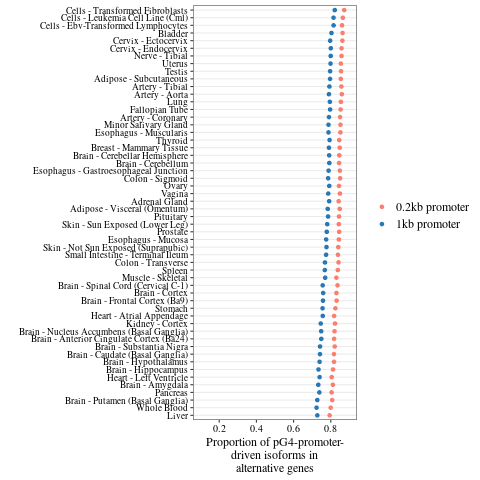

In [29]:
%%R -i Express_g4_prop,MarkedAlternativateGene
setwd("/disk2/G4_MS/transcript/genes/analysis")
library(ggplot2)

ggplot(MarkedAlternativateGene,aes(x=reorder(Tissue,bothprop),y=bothprop,color=group))+geom_point()+coord_flip()+ 
    xlab("")+ylab("Prop.alt-pG4 genes expressing \nG4 and non-G4 isoforms")+theme_bw()+
    scale_y_continuous(limits = c(0.1,0.9),breaks = c(0.2,0.4,0.6,0.8),)+
    theme(legend.title = element_blank(),
        legend.text=element_text(colour="black",family="Times",size=12),
        axis.text.x=element_text(colour="black",family="Times",size=10), #设置x轴刻度标签的字体属性
        axis.text.y=element_text(colour="black",family="Times",size=9.4,face="plain"), #设置x轴刻度标签的字体属性
        axis.title.x=element_text(colour="black",family="Times",size = 12,face="plain",hjust = 0.5,vjust =1), #设置x轴的标题的字体属性
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank())
ggsave("GTE_alternativate_genes_Bothvsone.pdf")

# oneExpress_g4_prop$fre = oneExpress_g4_prop$G4number / (oneExpress_g4_prop$G4number+oneExpress_g4_prop$NonG4number)

# ggplot(oneExpress_g4_prop,aes(x=reorder(Tissue,fre),y=fre,color=group))+geom_point()+coord_flip()+
# xlab("")+ylab("Prop.alt-pG4 genes expressing \nonly G4 and non-G4 isoforms")+theme_bw()+
# scale_y_continuous(limits = c(0.1,0.9),breaks = c(0.2,0.4,0.6,0.8),)+
# theme(  legend.title = element_blank(),
#         legend.text=element_text(colour="black",family="Times",size=12),
#         axis.text.x=element_text(colour="black",family="Times",size=10),
#         axis.text.y=element_text(colour="black",family="Times",size=9.4,face="plain"), 
#         axis.title.x=element_text(colour="black",family="Times",size = 12,face="plain",hjust = 0.5,vjust =1),
#         panel.grid.major.x = element_blank(), 
#         panel.grid.minor.x = element_blank())
# ggsave("GTE_alternativate_genes_G4vsNonG.pdf")

Express_g4_prop$fre = Express_g4_prop$G4number / (Express_g4_prop$G4number+Express_g4_prop$NonG4number)

ggplot(Express_g4_prop,aes(x=reorder(Tissue,fre),y=fre,color=group))+geom_point()+coord_flip()+
xlab("")+ylab("Proportion of pG4-promoter-\ndriven isoforms in\nalternative genes")+theme_bw()+
scale_y_continuous(limits = c(0.1,0.9),breaks = c(0.2,0.4,0.6,0.8),)+
scale_color_manual(values=c("#FA7F6F","#2878b5"))+
theme(  legend.title = element_blank(),
        legend.text=element_text(colour="black",family="Times",size=12),
        axis.text.x=element_text(colour="black",family="Times",size=10),
        axis.text.y=element_text(colour="black",family="Times",size=9.4,face="plain"), 
        axis.title.x=element_text(colour="black",family="Times",size = 12,face="plain",hjust = 0.5,vjust =1),
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank())
# ggsave("GTE_alternativate_genes_G4vsNonG.pdf")

### Figure 3d and 3c

##  K562 vs HepG2
### different promoter activities analyses by DESeq2 in K562 and HepG2 cells
#### 	BG4 ChIP-seq in K562 and HepG2 cells: GSE107690
#### RNA-seq datat were obtain from ENCODE databse

In [ ]:
%%R 
setwd("/disk2/project/g_quadruplex/transcript/data/Salmon")
# DTE analysis
library(data.table)
library(tximport)
library(DESeq2)
library(GenomicFeatures)
library(apeglm)
library(ggplot2)
library(ggrepel)
library(EnhancedVolcano)
library(dpylr)
library("rnaseqDTU")
library(DRIMSeq)
library(DEXSeq)
library(stageR)

## tsdb get
txdb.filename <- "gencode.v38.annotation.sqlite"
# txdb <- makeTxDbFromGFF(gtf)
# saveDb(txdb, txdb.filename)
txdb <- loadDb(txdb.filename)
txdf <- AnnotationDbi::select(txdb, keys(txdb, "GENEID"), "TXNAME", "GENEID")
# tab <- table(txdf$GENEID)
# txdf$ntx <- tab[match(txdf$GENEID, names(tab))]


##### salmon result for dte ################
samps <- data.frame(sample_id=c("HepG2_rep1","HepG2_rep2","K562_rep1","K562_rep2"),condition=c("HepG2","HepG2","K562","K562"))
samps$condition <- as.factor(samps$condition)
samps$condition <- relevel(samps$condition,ref="HepG2")
row.names(samps) <- samps$sample_id

files <- file.path("/disk2/project/new_G4/transcript/data/Salmon", samps$sample_id, "quant.sf")
names(files) <- samps$sample_id
txi.numreads <- tximport(files, type="salmon", txIn = TRUE, txOut=TRUE,
                countsFromAbundance="no")
count_result <- as.data.frame(txi.numreads$counts)
count_result$transcript_id <- row.names(count_result)
### promoter annotion get 
promoter_info <- read.table("/disk2/G4_MS/transcript/genes/data/promoter.annotion.tsv",header = T)
# promoter_info$Promoter_id <- paste("prmtr",promoter_info$Promoter_id,sep="")
exprSetpromtoerInfoMergedCount <- na.omit(dplyr::left_join(count_result, promoter_info, by="transcript_id"))
exprSet <- exprSetpromtoerInfoMergedCount %>% select(Promoter_id,HepG2_rep1,HepG2_rep2,K562_rep1,K562_rep2)
exprSet <- as.data.frame(exprSet %>% 
              group_by(Promoter_id) %>% 
              summarise_at(
                  c("HepG2_rep1","HepG2_rep2","K562_rep1","K562_rep2"),
                  list(sums =~sum(.)
                      ),
              )
            )
row.names(exprSet) <- exprSet$Promoter_id
exprSet <- exprSet[,2:ncol(exprSet)]
exprSet <- round(exprSet)
colnames(exprSet) <- c("HepG2_rep1","HepG2_rep2","K562_rep1","K562_rep2")
dds <- DESeqDataSetFromMatrix(exprSet,colData = samps, design = ~condition)
dds <- DESeq(dds)
cbind(resultsNames(dds))
res <- DESeq2::results(dds, name = "condition_K562_vs_HepG2", alpha = 0.05)
print(summary(res))

resLFC = lfcShrink(dds, coef = "condition_K562_vs_HepG2", type="apeglm")
DESeq2::plotMA(resLFC,alpha=0.05,ylim=c(-6,6),main = "MA-plot for the shrunken log2 fold changes")

# annoData <- "/usr/refence/salmon/GencodeV38.annotion.tsv"
# annoData <- data.frame(fread(annoData))
normCounts = as.data.frame(counts(dds, normalized = TRUE))
baseMeans = as.data.frame(sapply(levels(dds$condition),
                                 function(lvl) rowMeans( counts(dds, normalized = TRUE)[, dds$condition == lvl, drop = FALSE] ) 
                                 )
                         )
normData = merge(promoter_info, merge(baseMeans, normCounts, by.x = 'row.names', by.y = 'row.names'), by.x = 'Promoter_id', by.y = 'Row.names')

normData = normData[order(normData$Chromosome, normData$Start, normData$End),]
deData = data.frame(res[,c(1,2,5,6)])
colnames(deData) = c("baseMean","log2fc","pvalue","padj")
deData <- merge(promoter_info, deData, by.x = 'Promoter_id', by.y = 'row.names')
deData <- na.omit(deData)
deData = deData[order(deData$Chromosome, deData$Start, deData$End),]
write.table(normData, file="DTE_DESeq2_Means_and_NormalisedCount.Salmon.txt", 
sep = "\t", quote = F, row.names = F, col.names = T)
write.table(deData, file="DTE_DESeq2_DE_results.Salmon.txt", 
sep = "\t", quote = F, row.names = F, col.names = T)

In [32]:
import os
import pandas as pd
import pyranges as pr
import numpy as np

def fre_get(df,key):
    return df[key].sum()

os.chdir("/disk2/G4_MS/transcript/genes/analysis")
dteresult_path = "/disk2/project/g_quadruplex/transcript/data/Salmon/DTE_DESeq2_DE_results.Salmon.txt"
promoter_path = "/disk2/G4_MS/transcript/genes/data/promoter.annotion.tsv"
hepG2_G4path = "/disk2/project/g_quadruplex/transcript/data/HepG2_async_rep1-3.mult.6of9.bed"
k562_G4_path = "/disk2/project/g_quadruplex/transcript/data/K562_async_rep1-3.mult.5of8.bed"
gtf = pd.read_table(promoter_path)
gtff = pr.PyRanges(gtf)
k562 = pr.read_bed(k562_G4_path)
hepG2 = pr.read_bed(hepG2_G4path)

# gtf = gtf.as_df()
hepG2_g4_info = gtff.overlap(hepG2)
hepG2_g4 = gtf.loc[:,["Promoter_id",'transcript_id','gene_id']]
# hepG2_g4 = gtf.loc[:,['Chromosome', 'Start', 'End', 'Score', 'Strand','gene_id', 'gene_type', 'gene_name', 'transcript_id', 'transcript_type', 'transcript_name']]
hepG2_g4_index = hepG2_g4[hepG2_g4.Promoter_id.isin(hepG2_g4_info.Promoter_id)].index
hepG2_g4.loc[hepG2_g4_index,["g4info"]] = 1
hepG2_g4.g4info = hepG2_g4.g4info.fillna(0)
k562_g4_info = gtff.overlap(k562)
k562_g4 = gtf.loc[:,["Promoter_id","transcript_id",'gene_id']]
k562_g4_index = k562_g4[k562_g4.Promoter_id.isin(k562_g4_info.Promoter_id)].index
k562_g4.loc[k562_g4_index,["g4info"]] = 1
k562_g4.g4info = k562_g4.g4info.fillna(0)
##################
dte_path = "/disk2/project/g_quadruplex/transcript/data/Salmon/DTE_DESeq2_DE_results.Salmon.txt"
dte = pd.read_table(dte_path)
dte = dte.dropna()
dte_hepG2_index = dte[dte.Promoter_id.isin(hepG2_g4[hepG2_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_hepG2_index,["hepG2"]] = 1
dte_k562_index = dte[dte.Promoter_id.isin(k562_g4[k562_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_k562_index,["k562"]] = 1
dte.hepG2 = dte.hepG2.fillna(0)
dte.k562 = dte.k562.fillna(0)
dte.loc[dte.query('hepG2==1 and k562==1').log2fc.index,"group"] = 1
dte.loc[dte.query('hepG2==1 and k562==0').log2fc.index,"group"] = 2
dte.loc[dte.query('hepG2==0 and k562==1').log2fc.index,"group"] = 3
dte.loc[dte.query('hepG2==0 and k562==0').log2fc.index,"group"] = 4
###################
# dte = dte[dte.padj < 0.1]
bins = np.arange(-30,26)
cuts = pd.cut(dte.log2fc,bins=bins)
dte_result = pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="hepG2").hepG2).join(pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="k562").k562)).join(pd.DataFrame(cuts.value_counts()))
dte_result.rename(columns={"log2fc":"total_Promoter"},inplace=True)
dte_result.loc[:,"log2fc"] = list(range(-30,0))+list(range(1,26))

In [33]:
# fold change in different groups in 1kb promoters
print(2 ** dte[dte.group==1].log2fc.median())
print(2 ** dte[dte.group==2].log2fc.median())
print(2 ** dte[dte.group==3].log2fc.median())
print(2 ** dte[dte.group==4].log2fc.median())

0.9762272975163717
0.4938385148626458
1.2570872998406826
1.018313199297842


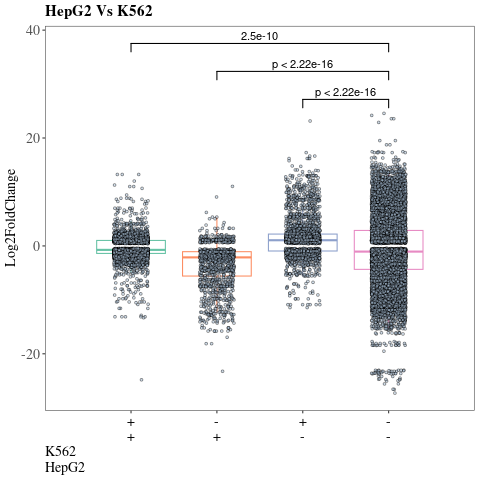

In [34]:
%%R -i dte_result,dte
library(ggplot2)
library(ggsignif)
library(ggsci)
library(RColorBrewer)
# library(ggthemes)
setwd("/disk2/G4_MS/transcript/genes/analysis")
dte_result <- data.frame(dte_result)
dte <- data.frame(dte)

dte$group <- as.factor(dte$group)
cols <- brewer.pal(4, "Set2")

dte <- dte[dte$padj<0.1,]
compared_list = list(c(3,4),c(2, 4),c(1,4)) 
ggplot(data=dte,aes(x=group,y=log2fc,fill=group)) + #stat_boxplot(geom = "errorbar",width=0.15,aes(color="black"))+
geom_boxplot(fill=NA,outlier.shape = NA, width = 0.8, lwd = 0.5,colour = cols)+
geom_jitter(alpha = 0.5,width =0.2,shape = 21,size=1, fill="#A1B7CD")+
geom_signif(comparisons = compared_list, test = wilcox.test, step_increase = 0.1)+
scale_x_discrete(limits=c(1,2,3,4),breaks = c(1,2,3,4),labels=c("+\n+","-\n+","+\n-","-\n-"))+  
labs(title = "HepG2 Vs K562")+

theme_bw()+ 
  theme(legend.position="none",
        axis.text.x=element_text(colour="black",family="Times",size=14),
        axis.text.y=element_text(family="Times",size=14,face="plain"), 
        axis.title.y=element_text(family="Times",size = 14,face="plain"),
        axis.title.x=element_text(family="Times",size = 14,face="plain",hjust = 0,vjust =1), 
        plot.title = element_text(family="Times",size=15,face="bold",hjust = 0),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
  ylab("Log2FoldChange") + xlab("K562\nHepG2") 
# ggsave("DTE_expression_G4.pdf")

In [3]:
# 0.2kb promoter
import os
import pandas as pd
import pyranges as pr
import numpy as np

def fre_get(df,key):
    return df[key].sum()

os.chdir("/disk2/G4_MS/transcript/genes/analysis")
# dteresult_path = "/disk2/project/g_quadruplex/transcript/data/Salmon/DTE_DESeq2_DE_results.Salmon.txt"
# gtf_path = "/disk2/project/g_quadruplex/reference/gencode.v38.annotation.transcript_basic.gtf"
promoter_path = "/disk2/G4_MS/transcript/genes/data/promoter_info.annotion.H3K4me3.tsv"
hepG2_G4path = "/disk2/project/g_quadruplex/transcript/data/HepG2_async_rep1-3.mult.6of9.bed"
k562_G4_path = "/disk2/project/g_quadruplex/transcript/data/K562_async_rep1-3.mult.5of8.bed"
promoter = pr.PyRanges(pd.read_table(promoter_path))

k562 = pr.read_bed(k562_G4_path)
hepG2 = pr.read_bed(hepG2_G4path)
promoterf = promoter
promoter = promoter.as_df()
hepG2_g4_info = promoterf.overlap(hepG2)
hepG2_g4 = promoter.loc[:,["Promoter_id", 'transcript_id','gene_id']]
# hepG2_g4 = gtf.loc[:,['Chromosome', 'Start', 'End', 'Score', 'Strand','gene_id', 'gene_type', 'gene_name', 'transcript_id', 'transcript_type', 'transcript_name']]
hepG2_g4_index = hepG2_g4[hepG2_g4.Promoter_id.isin(hepG2_g4_info.Promoter_id)].index
hepG2_g4.loc[hepG2_g4_index,["g4info"]] = 1
hepG2_g4.g4info = hepG2_g4.g4info.fillna(0)
k562_g4_info = promoterf.overlap(k562)
k562_g4 = promoter.loc[:,["Promoter_id", 'transcript_id','gene_id']]
k562_g4_index = k562_g4[k562_g4.Promoter_id.isin(k562_g4_info.Promoter_id)].index
k562_g4.loc[k562_g4_index,["g4info"]] = 1
k562_g4.g4info = k562_g4.g4info.fillna(0)
##################
dte_path = "/disk2/project/g_quadruplex/transcript/data/Salmon/DTE_DESeq2_DE_results.Salmon.txt"
dte = pd.read_table(dte_path)
dte = dte.dropna()
dte_hepG2_index = dte[dte.Promoter_id.isin(hepG2_g4[hepG2_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_hepG2_index,["hepG2"]] = 1
dte_k562_index = dte[dte.Promoter_id.isin(k562_g4[k562_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_k562_index,["k562"]] = 1
dte.hepG2 = dte.hepG2.fillna(0)
dte.k562 = dte.k562.fillna(0)
dte.loc[dte.query('hepG2==1 and k562==1').log2fc.index,"group"] = 1
dte.loc[dte.query('hepG2==1 and k562==0').log2fc.index,"group"] = 2
dte.loc[dte.query('hepG2==0 and k562==1').log2fc.index,"group"] = 3
dte.loc[dte.query('hepG2==0 and k562==0').log2fc.index,"group"] = 4
###################
# dte = dte[dte.padj < 0.05]
bins = np.arange(-30,26)
cuts = pd.cut(dte.log2fc,bins=bins)
dte_result = pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="hepG2").hepG2).join(pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="k562").k562)).join(pd.DataFrame(cuts.value_counts()))
dte_result.rename(columns={"log2fc":"total_Promoter"},inplace=True)
dte_result.loc[:,"log2fc"] = list(range(-30,0))+list(range(1,26))

In [4]:
print(2 ** dte[dte.group==1].log2fc.median())
print(2 ** dte[dte.group==2].log2fc.median())
print(2 ** dte[dte.group==3].log2fc.median())
print(2 ** dte[dte.group==4].log2fc.median())

0.9787353944565791
0.48171905345858296
1.2702620367178257
1.0105534551082422


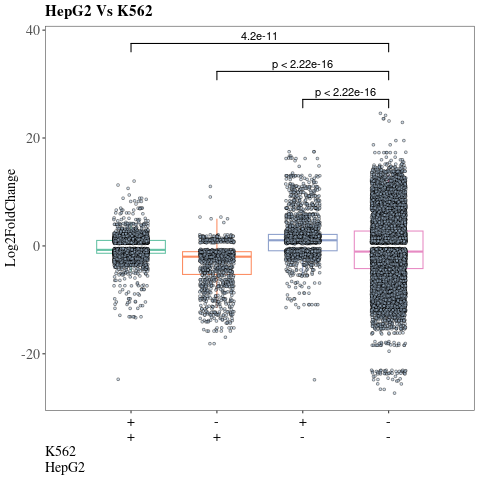

In [7]:
%%R -i dte_result,dte
library(ggplot2)
library(ggsignif)
library(ggsci)
library(RColorBrewer)
# library(ggthemes)
setwd("/disk2/G4_MS/transcript/genes/analysis")
dte_result <- data.frame(dte_result)
dte <- data.frame(dte)

dte$group <- as.factor(dte$group)
cols <- brewer.pal(4, "Set2")

dte <- dte[dte$padj<0.1,]
compared_list = list(c(3,4),c(2, 4),c(1,4)) 
ggplot(data=dte,aes(x=group,y=log2fc,fill=group)) + #stat_boxplot(geom = "errorbar",width=0.15,aes(color="black"))+
geom_boxplot(fill=NA,outlier.shape = NA, width = 0.8, lwd = 0.5,colour = cols)+
geom_jitter(alpha = 0.5,width =0.2,shape = 21,size=1, fill="#A1B7CD")+
geom_signif(comparisons = compared_list, test = wilcox.test, step_increase = 0.1)+
scale_x_discrete(limits=c(1,2,3,4),breaks = c(1,2,3,4),labels=c("+\n+","-\n+","+\n-","-\n-"))+  
labs(title = "HepG2 Vs K562")+

theme_bw()+ 
  theme(legend.position="none", 
        axis.text.x=element_text(colour="black",family="Times",size=14), 
        axis.text.y=element_text(family="Times",size=14,face="plain"), 
        axis.title.y=element_text(family="Times",size = 14,face="plain"), 
        axis.title.x=element_text(family="Times",size = 14,face="plain",hjust = 0,vjust =1), 
        plot.title = element_text(family="Times",size=15,face="bold",hjust = 0), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
  ylab("Log2FoldChange") + xlab("K562\nHepG2")
# ggsave("H3K4me3_DTE_expression_G4.pdf")

## supplementary Fig 8 

## U2OS vs K562
### the sG4-Chip-seq were obtain from the GEO database (GSE207567)
### RNA-seq in U2OS and K562 cells: GSE173483, GSE228464

In [8]:
import os
import pandas as pd
import pyranges as pr
import numpy as np

def fre_get(df,key):
    return df[key].sum()

os.chdir("/disk2/G4_MS/review/celline_compared/salom/analysis")
# dteresult_path = "/disk2/G4_MS/review/salom/U2OS_K562_DTE_DESeq2_DE_results.Salmon.txt"
promoter_path = "/disk2/G4_MS/transcript/genes/data/promoter.annotion.tsv"
u2os_G4path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/U2OS_biorep_2to3_multintersect.bed"
k562_G4_path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/K562_biorep_2to3_multintersect.bed"
gtf = pd.read_table(promoter_path)
gtff = pr.PyRanges(gtf)
k562 = pr.read_bed(k562_G4_path)
u2os = pr.read_bed(u2os_G4path)

# gtf = gtf.as_df()
u2os_g4_info = gtff.overlap(u2os)
u2os_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
# u2os_g4 = gtf.loc[:,['Chromosome', 'Start', 'End', 'Score', 'Strand','gene_id', 'gene_type', 'gene_name', 'transcript_id', 'transcript_type', 'transcript_name']]
u2os_g4_index = u2os_g4[u2os_g4.Promoter_id.isin(u2os_g4_info.Promoter_id)].index
u2os_g4.loc[u2os_g4_index,["g4info"]] = 1
u2os_g4.g4info = u2os_g4.g4info.fillna(0)
k562_g4_info = gtff.overlap(k562)
k562_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
k562_g4_index = k562_g4[k562_g4.Promoter_id.isin(k562_g4_info.Promoter_id)].index
k562_g4.loc[k562_g4_index,["g4info"]] = 1
k562_g4.g4info = k562_g4.g4info.fillna(0)
##################
dte_path = "/disk2/G4_MS/review/celline_compared/salom/U2OS_K562_DTE_DESeq2_DE_results.Salmon.txt"
dte = pd.read_table(dte_path)
dte = dte.dropna()
dte=dte.drop(columns=["transcript_id"])
dte.drop_duplicates(inplace=True)
dte_u2os_index = dte[dte.Promoter_id.isin(u2os_g4[u2os_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_u2os_index,["u2os"]] = 1
dte_k562_index = dte[dte.Promoter_id.isin(k562_g4[k562_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_k562_index,["k562"]] = 1
dte.u2os = dte.u2os.fillna(0)
dte.k562 = dte.k562.fillna(0)
dte.loc[dte.query('u2os==1 and k562==1').log2fc.index,"group"] = 1
dte.loc[dte.query('u2os==1 and k562==0').log2fc.index,"group"] = 2
dte.loc[dte.query('u2os==0 and k562==1').log2fc.index,"group"] = 3
dte.loc[dte.query('u2os==0 and k562==0').log2fc.index,"group"] = 4
###################
# dte = dte[dte.padj < 0.1]
bins = np.arange(-30,26)
cuts = pd.cut(dte.log2fc,bins=bins)
dte_result = pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="u2os").u2os).join(pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="k562").k562)).join(pd.DataFrame(cuts.value_counts()))
dte_result.rename(columns={"log2fc":"total_Promoter"},inplace=True)
dte_result.loc[:,"log2fc"] = list(range(-30,0))+list(range(1,26))

print(dte[dte.group==1].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==1) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==2].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==2) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==3].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==3) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==4].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==4) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])

4677
3697
2802
2277
871
712
15109
10081


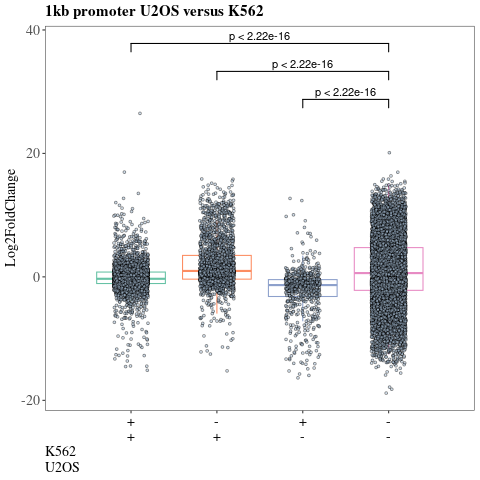

In [9]:
%%R -i dte_result,dte
library(ggplot2)
library(ggsignif)
library(ggsci)
library(RColorBrewer)
# library(ggthemes)
setwd("/disk2/G4_MS/review/celline_compared/salom/analysis")
dte_result <- data.frame(dte_result)
dte <- data.frame(dte)

dte$group <- as.factor(dte$group)
cols <- brewer.pal(4, "Set2")

dte <- dte[dte$padj<0.1,]
compared_list = list(c(3,4),c(2, 4),c(1,4)) 
ggplot(data=dte,aes(x=group,y=log2fc,fill=group)) + #stat_boxplot(geom = "errorbar",width=0.15,aes(color="black"))+
geom_boxplot(fill=NA,outlier.shape = NA, width = 0.8, lwd = 0.5,colour = cols)+
geom_jitter(alpha = 0.5,width =0.2,shape = 21,size=1, fill="#A1B7CD")+
geom_signif(comparisons = compared_list, test = wilcox.test, step_increase = 0.1)+
scale_x_discrete(limits=c(1,2,3,4),breaks = c(1,2,3,4),labels=c("+\n+","-\n+","+\n-","-\n-"))+  
labs(title = "1kb promoter U2OS versus K562")+

theme_bw()+ 
  theme(legend.position="none", 
        axis.text.x=element_text(colour="black",family="Times",size=14),
        axis.text.y=element_text(family="Times",size=14,face="plain"),
        axis.title.y=element_text(family="Times",size = 14,face="plain"),
        axis.title.x=element_text(family="Times",size = 14,face="plain",hjust = 0,vjust =1),
        plot.title = element_text(family="Times",size=15,face="bold",hjust = 0),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  ylab("Log2FoldChange") + xlab("K562\nU2OS") 
# ggsave("promoter_DTE_expression_G4.pdf")

### 0.2kb promoter

In [10]:
import os
import pandas as pd
import pyranges as pr
import numpy as np

def fre_get(df,key):
    return df[key].sum()

os.chdir("/disk2/G4_MS/review/celline_compared/salom/analysis")
# dteresult_path = "/disk2/G4_MS/review/salom/U2OS_K562_DTE_DESeq2_DE_results.Salmon.txt"
promoter_path = "/disk2/G4_MS/transcript/genes/data/promoter_info.annotion.H3K4me3.tsv"
u2os_G4path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/U2OS_biorep_2to3_multintersect.bed"
k562_G4_path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/K562_biorep_2to3_multintersect.bed"
gtf = pd.read_table(promoter_path)
gtff = pr.PyRanges(gtf)
k562 = pr.read_bed(k562_G4_path)
u2os = pr.read_bed(u2os_G4path)

# gtf = gtf.as_df()
u2os_g4_info = gtff.overlap(u2os)
u2os_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
# u2os_g4 = gtf.loc[:,['Chromosome', 'Start', 'End', 'Score', 'Strand','gene_id', 'gene_type', 'gene_name', 'transcript_id', 'transcript_type', 'transcript_name']]
u2os_g4_index = u2os_g4[u2os_g4.Promoter_id.isin(u2os_g4_info.Promoter_id)].index
u2os_g4.loc[u2os_g4_index,["g4info"]] = 1
u2os_g4.g4info = u2os_g4.g4info.fillna(0)
k562_g4_info = gtff.overlap(k562)
k562_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
k562_g4_index = k562_g4[k562_g4.Promoter_id.isin(k562_g4_info.Promoter_id)].index
k562_g4.loc[k562_g4_index,["g4info"]] = 1
k562_g4.g4info = k562_g4.g4info.fillna(0)
##################
dte_path = "/disk2/G4_MS/review/celline_compared/salom/U2OS_K562_DTE_DESeq2_DE_results.Salmon.txt"
dte = pd.read_table(dte_path)
dte = dte.dropna()
dte=dte.drop(columns=["transcript_id"])
dte.drop_duplicates(inplace=True)
dte_u2os_index = dte[dte.Promoter_id.isin(u2os_g4[u2os_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_u2os_index,["u2os"]] = 1
dte_k562_index = dte[dte.Promoter_id.isin(k562_g4[k562_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_k562_index,["k562"]] = 1
dte.u2os = dte.u2os.fillna(0)
dte.k562 = dte.k562.fillna(0)
dte.loc[dte.query('u2os==1 and k562==1').log2fc.index,"group"] = 1
dte.loc[dte.query('u2os==1 and k562==0').log2fc.index,"group"] = 2
dte.loc[dte.query('u2os==0 and k562==1').log2fc.index,"group"] = 3
dte.loc[dte.query('u2os==0 and k562==0').log2fc.index,"group"] = 4
###################
# dte = dte[dte.padj < 0.1]
bins = np.arange(-30,26)
cuts = pd.cut(dte.log2fc,bins=bins)
dte_result = pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="u2os").u2os).join(pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="k562").k562)).join(pd.DataFrame(cuts.value_counts()))
dte_result.rename(columns={"log2fc":"total_Promoter"},inplace=True)
dte_result.loc[:,"log2fc"] = list(range(-30,0))+list(range(1,26))

print(dte[dte.group==1].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==1) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==2].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==2) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==3].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==3) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==4].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==4) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])

3955
3207
2505
2061
701
578
16298
10921


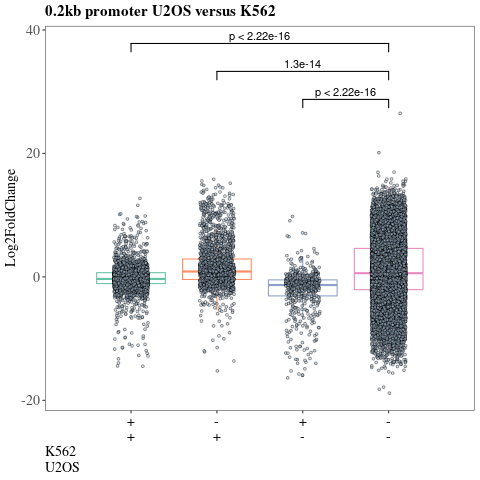

In [11]:
%%R -i dte_result,dte
library(ggplot2)
library(ggsignif)
library(ggsci)
library(RColorBrewer)
# library(ggthemes)
setwd("/disk2/G4_MS/review/celline_compared/salom/analysis")
dte_result <- data.frame(dte_result)
dte <- data.frame(dte)

dte$group <- as.factor(dte$group)
cols <- brewer.pal(4, "Set2")

dte <- dte[dte$padj<0.1,]
compared_list = list(c(3,4),c(2, 4),c(1,4)) 
ggplot(data=dte,aes(x=group,y=log2fc,fill=group)) + #stat_boxplot(geom = "errorbar",width=0.15,aes(color="black"))+
geom_boxplot(fill=NA,outlier.shape = NA, width = 0.8, lwd = 0.5,colour = cols)+
geom_jitter(alpha = 0.5,width =0.2,shape = 21,size=1, fill="#A1B7CD")+
geom_signif(comparisons = compared_list, test = wilcox.test, step_increase = 0.1)+
scale_x_discrete(limits=c(1,2,3,4),breaks = c(1,2,3,4),labels=c("+\n+","-\n+","+\n-","-\n-"))+  
labs(title = "0.2kb promoter U2OS versus K562")+

theme_bw()+ 
  theme(legend.position="none",
        axis.text.x=element_text(colour="black",family="Times",size=14), 
        axis.text.y=element_text(family="Times",size=14,face="plain"), 
        axis.title.y=element_text(family="Times",size = 14,face="plain"),
        axis.title.x=element_text(family="Times",size = 14,face="plain",hjust = 0,vjust =1), 
        plot.title = element_text(family="Times",size=15,face="bold",hjust = 0),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
  ylab("Log2FoldChange") + xlab("K562\nU2OS") 
# ggsave("0.2kbPromoter_DTE_expression_G4.pdf")

## A549 vs H1975
### the G4P-Chip-seq were obtain from the GEO database (GSE133379)
###  RNA-seq in A549 and H1975 cells: GSE197555 and GSE193258

### 1kb promoter 

In [12]:
import os
import pandas as pd
import pyranges as pr
import numpy as np

def fre_get(df,key):
    return df[key].sum()

os.chdir("/disk2/G4_MS/review/celline_compared/salom/analysis")
# dteresult_path = "/disk2/G4_MS/review/salom/A549_H1975_DTE_DESeq2_DE_results.Salmon.txt"
promoter_path = "/disk2/G4_MS/transcript/genes/data/promoter.annotion.tsv"
A549_G4path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/A549_overlap.bed"
H1975_G4_path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/H1975_overlap.bed"
gtf = pd.read_table(promoter_path)
gtff = pr.PyRanges(gtf)
H1975 = pr.read_bed(H1975_G4_path)
A549 = pr.read_bed(A549_G4path)

# gtf = gtf.as_df()
A549_g4_info = gtff.overlap(A549)
A549_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
# A549_g4 = gtf.loc[:,['Chromosome', 'Start', 'End', 'Score', 'Strand','gene_id', 'gene_type', 'gene_name', 'transcript_id', 'transcript_type', 'transcript_name']]
A549_g4_index = A549_g4[A549_g4.Promoter_id.isin(A549_g4_info.Promoter_id)].index
A549_g4.loc[A549_g4_index,["g4info"]] = 1
A549_g4.g4info = A549_g4.g4info.fillna(0)
H1975_g4_info = gtff.overlap(H1975)
H1975_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
H1975_g4_index = H1975_g4[H1975_g4.Promoter_id.isin(H1975_g4_info.Promoter_id)].index
H1975_g4.loc[H1975_g4_index,["g4info"]] = 1
H1975_g4.g4info = H1975_g4.g4info.fillna(0)
##################
dte_path = "/disk2/G4_MS/review/celline_compared/salom/A549_H1975_DTE_DESeq2_DE_results.Salmon.txt"
dte = pd.read_table(dte_path)
dte = dte.dropna()
dte=dte.drop(columns=["transcript_id"])
dte.drop_duplicates(inplace=True)
dte_A549_index = dte[dte.Promoter_id.isin(A549_g4[A549_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_A549_index,["A549"]] = 1
dte_H1975_index = dte[dte.Promoter_id.isin(H1975_g4[H1975_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_H1975_index,["H1975"]] = 1
dte.A549 = dte.A549.fillna(0)
dte.H1975 = dte.H1975.fillna(0)
dte.loc[dte.query('A549==1 and H1975==1').log2fc.index,"group"] = 1
dte.loc[dte.query('A549==1 and H1975==0').log2fc.index,"group"] = 2
dte.loc[dte.query('A549==0 and H1975==1').log2fc.index,"group"] = 3
dte.loc[dte.query('A549==0 and H1975==0').log2fc.index,"group"] = 4
###################
# dte = dte[dte.padj < 0.1]
bins = np.arange(-30,26)
cuts = pd.cut(dte.log2fc,bins=bins)
dte_result = pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="A549").A549).join(pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="H1975").H1975)).join(pd.DataFrame(cuts.value_counts()))
dte_result.rename(columns={"log2fc":"total_Promoter"},inplace=True)
dte_result.loc[:,"log2fc"] = list(range(-30,0))+list(range(1,26))

print(dte[dte.group==1].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==1) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==2].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==2) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==3].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==3) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==4].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==4) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])

8767
5540
908
572
2617
1740
9480
5150


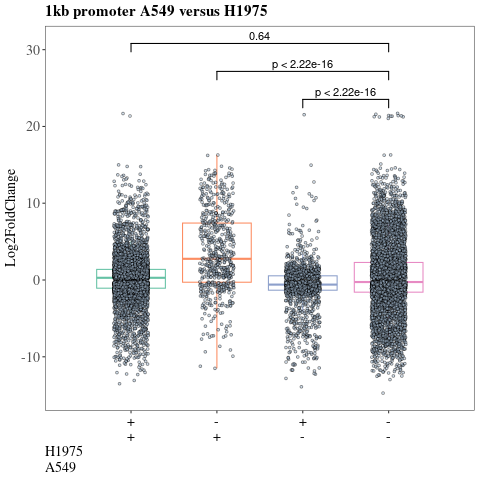

In [13]:
%%R -i dte_result,dte
library(ggplot2)
library(ggsignif)
library(ggsci)
library(RColorBrewer)
# library(ggthemes)
setwd("/disk2/G4_MS/review/celline_compared/salom/analysis")
dte_result <- data.frame(dte_result)
dte <- data.frame(dte)

dte$group <- as.factor(dte$group)
cols <- brewer.pal(4, "Set2")

dte <- dte[dte$padj<0.1,]
compared_list = list(c(3,4),c(2, 4),c(1,4)) 
ggplot(data=dte,aes(x=group,y=log2fc,fill=group)) + #stat_boxplot(geom = "errorbar",width=0.15,aes(color="black"))+
geom_boxplot(fill=NA,outlier.shape = NA, width = 0.8, lwd = 0.5,colour = cols)+
geom_jitter(alpha = 0.5,width =0.2,shape = 21,size=1, fill="#A1B7CD")+
geom_signif(comparisons = compared_list, test = wilcox.test, step_increase = 0.1)+
scale_x_discrete(limits=c(1,2,3,4),breaks = c(1,2,3,4),labels=c("+\n+","-\n+","+\n-","-\n-"))+  
labs(title = "1kb promoter A549 versus H1975")+

theme_bw()+ 
  theme(legend.position="none",
        axis.text.x=element_text(colour="black",family="Times",size=14), 
        axis.text.y=element_text(family="Times",size=14,face="plain"),
        axis.title.y=element_text(family="Times",size = 14,face="plain"), 
        axis.title.x=element_text(family="Times",size = 14,face="plain",hjust = 0,vjust =1),
        plot.title = element_text(family="Times",size=15,face="bold",hjust = 0),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
  ylab("Log2FoldChange") + xlab("H1975\nA549")
# ggsave("1kbPromoter_A549vsH1975_DTE_expression_G4.pdf")

### 0.2kb promoter

In [14]:
import os
import pandas as pd
import pyranges as pr
import numpy as np

def fre_get(df,key):
    return df[key].sum()

os.chdir("/disk2/G4_MS/review/celline_compared/salom/analysis")
# dteresult_path = "/disk2/G4_MS/review/salom/A549_H1975_DTE_DESeq2_DE_results.Salmon.txt"
promoter_path = "/disk2/G4_MS/transcript/genes/data/promoter_info.annotion.H3K4me3.tsv"
A549_G4path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/A549_overlap.bed"
H1975_G4_path = "/disk2/G4_MS/review/celline_compared/salom/analysis/sG4_chip_seq/H1975_overlap.bed"
gtf = pd.read_table(promoter_path)
gtff = pr.PyRanges(gtf)
H1975 = pr.read_bed(H1975_G4_path)
A549 = pr.read_bed(A549_G4path)

# gtf = gtf.as_df()
A549_g4_info = gtff.overlap(A549)
A549_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
# A549_g4 = gtf.loc[:,['Chromosome', 'Start', 'End', 'Score', 'Strand','gene_id', 'gene_type', 'gene_name', 'transcript_id', 'transcript_type', 'transcript_name']]
A549_g4_index = A549_g4[A549_g4.Promoter_id.isin(A549_g4_info.Promoter_id)].index
A549_g4.loc[A549_g4_index,["g4info"]] = 1
A549_g4.g4info = A549_g4.g4info.fillna(0)
H1975_g4_info = gtff.overlap(H1975)
H1975_g4 = gtf.loc[:,["Promoter_id",'gene_id']]
H1975_g4_index = H1975_g4[H1975_g4.Promoter_id.isin(H1975_g4_info.Promoter_id)].index
H1975_g4.loc[H1975_g4_index,["g4info"]] = 1
H1975_g4.g4info = H1975_g4.g4info.fillna(0)
##################
dte_path = "/disk2/G4_MS/review/celline_compared/salom/A549_H1975_DTE_DESeq2_DE_results.Salmon.txt"
dte = pd.read_table(dte_path)
dte = dte.dropna()
dte=dte.drop(columns=["transcript_id"])
dte.drop_duplicates(inplace=True)
dte_A549_index = dte[dte.Promoter_id.isin(A549_g4[A549_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_A549_index,["A549"]] = 1
dte_H1975_index = dte[dte.Promoter_id.isin(H1975_g4[H1975_g4.g4info.isin([1])].Promoter_id)].index
dte.loc[dte_H1975_index,["H1975"]] = 1
dte.A549 = dte.A549.fillna(0)
dte.H1975 = dte.H1975.fillna(0)
dte.loc[dte.query('A549==1 and H1975==1').log2fc.index,"group"] = 1
dte.loc[dte.query('A549==1 and H1975==0').log2fc.index,"group"] = 2
dte.loc[dte.query('A549==0 and H1975==1').log2fc.index,"group"] = 3
dte.loc[dte.query('A549==0 and H1975==0').log2fc.index,"group"] = 4
###################
# dte = dte[dte.padj < 0.1]
bins = np.arange(-30,26)
cuts = pd.cut(dte.log2fc,bins=bins)
dte_result = pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="A549").A549).join(pd.DataFrame(dte.groupby(cuts).agg(fre_get,key="H1975").H1975)).join(pd.DataFrame(cuts.value_counts()))
dte_result.rename(columns={"log2fc":"total_Promoter"},inplace=True)
dte_result.loc[:,"log2fc"] = list(range(-30,0))+list(range(1,26))

print(dte[dte.group==1].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==1) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==2].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==2) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==3].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==3) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])
print(dte[dte.group==4].Promoter_id.drop_duplicates().shape[0])
print(dte[(dte.group==4) & (dte.padj<0.05)].Promoter_id.drop_duplicates().shape[0])

10247
6833
630
389
1689
1069
9206
4711


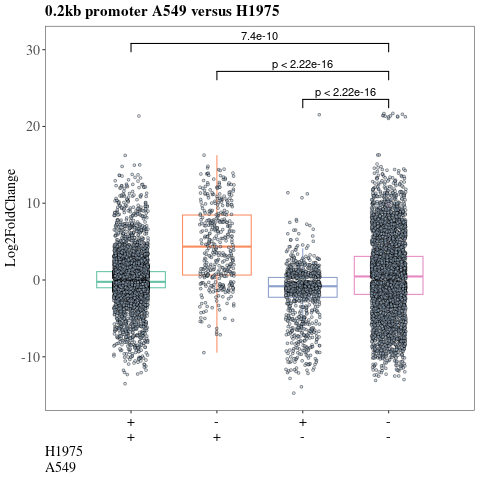

In [15]:
%%R -i dte_result,dte
library(ggplot2)
library(ggsignif)
library(ggsci)
library(RColorBrewer)
# library(ggthemes)
setwd("/disk2/G4_MS/review/celline_compared/salom/analysis")
dte_result <- data.frame(dte_result)
dte <- data.frame(dte)

dte$group <- as.factor(dte$group)
cols <- brewer.pal(4, "Set2")

dte <- dte[dte$padj<0.1,]
compared_list = list(c(3,4),c(2, 4),c(1,4)) 
ggplot(data=dte,aes(x=group,y=log2fc,fill=group)) + #stat_boxplot(geom = "errorbar",width=0.15,aes(color="black"))+
geom_boxplot(fill=NA,outlier.shape = NA, width = 0.8, lwd = 0.5,colour = cols)+
geom_jitter(alpha = 0.5,width =0.2,shape = 21,size=1, fill="#A1B7CD")+
geom_signif(comparisons = compared_list, test = wilcox.test, step_increase = 0.1)+
scale_x_discrete(limits=c(1,2,3,4),breaks = c(1,2,3,4),labels=c("+\n+","-\n+","+\n-","-\n-"))+  
labs(title = "0.2kb promoter A549 versus H1975")+

theme_bw()+ 
  theme(legend.position="none", 
        axis.text.x=element_text(colour="black",family="Times",size=14),
        axis.text.y=element_text(family="Times",size=14,face="plain"),
        axis.title.y=element_text(family="Times",size = 14,face="plain"),
        axis.title.x=element_text(family="Times",size = 14,face="plain",hjust = 0,vjust =1), 
        plot.title = element_text(family="Times",size=15,face="bold",hjust = 0), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
  ylab("Log2FoldChange") + xlab("H1975\nA549") 
# ggsave("0.2kbPromoter_A549vsH1975_DTE_expression_G4.pdf")

## Figure 5

### the TMPyp4-treated CUT&Tag and TT-seq dataset in HEK293T cells were download from GSE178668

In [ ]:
%%R
library("tximport")
library("DESeq2")
setwd("/disk2/G4_MS/transcript/HEK293")

## gene

In [ ]:
# spink in gene
directory <- "/disk2/G4_MS/transcript/HEK293/alignments_spike/"
sampleFiles <- grep("dm6.htseq_count_gene.tsv",list.files(directory),value=TRUE)
sampleTable <- data.frame(sampleName = c("SRR14879790", "SRR14879791", "SRR14879792", "SRR14879793"),
                          fileName = sampleFiles,
                          condition = c("DMSO", "DMSO", "TMPyP4", "TMPyP4"))
sampleTable$condition <- factor(sampleTable$condition)
dmddsHTSeq <- DESeqDataSetFromHTSeqCount(sampleTable = sampleTable,
                                       directory = directory,
                                       design= ~ condition)
keep <- rowSums(counts(dmddsHTSeq) >= 1) >= 2
dmddsHTSeq <- dmddsHTSeq[keep, ] 
dmddsHTSeq

In [ ]:
hg38directory <- "/disk2/G4_MS/transcript/HEK293/alignments/"
hg38sampleFiles <- grep("hg38.htseq_count_gene_reverse.tsv",list.files(hg38directory),value=TRUE)
hg38sampleTable <- data.frame(sampleName = c("SRR14879790", "SRR14879791", "SRR14879792", "SRR14879793"),
                          fileName = hg38sampleFiles,
                          condition = c("DMSO", "DMSO", "TMPyP4", "TMPyP4"))
hg38sampleTable$condition <- factor(hg38sampleTable$condition)

hg38ddsHTSeq <- DESeqDataSetFromHTSeqCount(sampleTable = hg38sampleTable,
                                       directory = hg38directory,
                                       design= ~ condition)
keep <- rowSums(counts(hg38ddsHTSeq) >= 1) >= 2
hg38ddsHTSeq <- hg38ddsHTSeq[keep, ] 
exprSet <- rbind(counts(hg38ddsHTSeq), counts(dmddsHTSeq))
dds <- DESeqDataSetFromMatrix(countData = exprSet, colData = hg38sampleTable, design= ~ condition)
dds <- estimateSizeFactors(dds, controlGenes=23675:30568)
dds <- estimateDispersions(dds)
dds <- nbinomWaldTest(dds)
res <- na.omit(results(dds))
res <- res[grep("ENSG", row.names(res)),]
# res[res$padj < 0.05,]
res_select <- res[res$padj < 0.05,]

In [ ]:
library(ggplot2)
library(ggrepel)

setwd("/disk2/G4_MS/transcript/HEK293/tt_seq")
res <- as.data.frame(na.omit(res))
res$change <- as.factor(
  ifelse(res$padj < 0.05 ,
         ifelse(res$log2FoldChange >= 0,'Up','Down'),
         'No change')
)

ggplot(data=res,aes(x=log2FoldChange,y=-log10(padj),color = change))+
  geom_point(alpha=0.9,size=1)+
  theme_bw(base_size = 15)+
  theme(panel.grid.minor = element_blank(),panel.grid.major = element_blank())+
#   geom_hline(yintercept = -log10(0.05),linetype = 4,color = "#999999")+
  geom_vline(xintercept = c(0),linetype=4,color = "#999999")+
  scale_color_manual(name = "",values = c("#CC0000","#BBBBBB","#2f5688"),limits = c("Up","No change","Down"))+
    xlim(-3,3)
ggsave("tt_seq_Diff_genes.vol.pdf",device = pdf())
dev.off()

## TMPyp4-treated CUT&Tag peaks in HEK239T were obtain using MACS2
```
the different G4 singinal annotion using bedtools software.and this file will be download from data of GitHub.
```

In [ ]:
library(DiffBind)
library(ggplot2)
setwd("/disk2/G4_MS/transcript/HEK293")
cut_tag <- dba(sampleSheet="cut_tag_sampleInfo.tsv")
cut_tag <- dba.blacklist(cut_tag, blacklist=DBA_BLACKLIST_HG38,
                             greylist=FALSE)
dbObj <- dba.count(cut_tag, bUseSummarizeOverlaps=TRUE)
dba.plotPCA(dbObj,  attributes=DBA_FACTOR, label=DBA_ID)
# dbObj <- dba.normalize(dbObj, bRetrieve=TRUE)
dbObj <- dba.contrast(dbObj, categories = DBA_CONDITION,minMembers = 2)
dbObj <- dba.analyze(dbObj,bGreylist=FALSE)
dbObj.DB <- dba.report(dbObj)
g <- dba.plotVolcano(dbObj)

### Fig 5c

(polygon[GRID.polygon.1089], polygon[GRID.polygon.1090], polygon[GRID.polygon.1091], polygon[GRID.polygon.1092], text[GRID.text.1093], text[GRID.text.1094], text[GRID.text.1095], text[GRID.text.1096], text[GRID.text.1097]) 


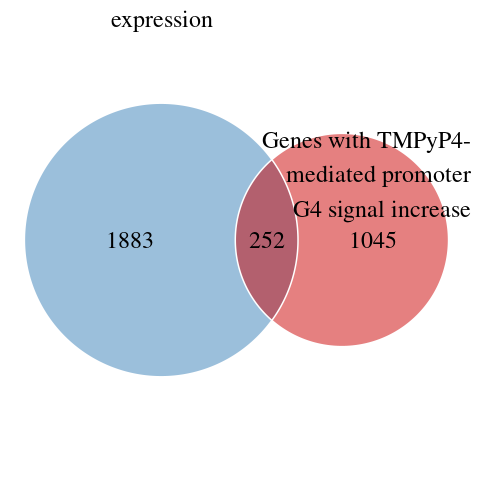

In [49]:
%%R
library(VennDiagram)
library(grid)
library(ggplot2)
setwd("/disk2/G4_MS/transcript/HEK293/tt_seq")
venn.plot <- draw.pairwise.venn(area1 = 2135, 
                                area2 = 1297,   #区域2的数 
                                cross.area = 252,  #重叠的个数 
                                category = c("Genes with TMPyP4-\nmediated differential\nexpression", 
                                             "Genes with TMPyP4-\nmediated promoter\nG4 signal increase"),#分类命名
#                                 fill = c("blue", "red"),#1 2 区域分别的填充颜色
                                fill = c("#377EB8", "#CC0000"),
                                col = c("white","white"),
#                                 lty = "blank",  #1 2 区域的边框线类型 
                                cex = 2,   #1 2 区域内部数字的字体大小 
                                cat.cex = 2,    # 分类名称的字体大小 
                                cat.dist = 0.09,   #分类名称距离边的距离 实际调整 
                                cat.just = list(c(-1, -1), c(1, 1)),  #分类名称的位置  ，圈内或者圈外
                                ext.pos = 30,  #线的角度 默认是正上方12点位置 
                                ext.dist = -0.05,   #外部线的距离  跟根据圆圈的大小适当调整
                                ext.length = 0.85,  #外部线长度 
                                ext.line.lwd = 2,  #外部线的宽度 
                                ext.line.lty = "dashed" )  #外部线为虚线);
# grid.draw(venn.plot)
venn.plot
# ggsave("DEGS_BG4_overlap.venn.pdf",venn.plot)
# dev.off()

## Fig 5d
### the 252 genes are download from the data("cut_tag_tt_seq_overlap_genes.xls" will upload the data)

In [ ]:
%%R
library(clusterProfiler)
library(ggplot2)
library(stringr)
library(GOplot)
library(org.Hs.eg.db)
library(topGO)

setwd("/disk2/G4_MS/transcript/HEK293/tt_seq/KEGG_overlap_genes")
diff_genes <- read.table("/disk2/G4_MS/transcript/HEK293/cut_tag_tt_seq_overlap_genes.xls",header = T, sep="\t")
diffgenes <- lapply(strsplit(diff_genes$geneId, "\\."), function(x) x[1]) %>% unlist
samplename <- "tt_seq_overlap_BG4"
dat_trans = bitr(unique(diffgenes), fromType="ENSEMBL", toType=c("SYMBOL", "ENTREZID"), OrgDb="org.Hs.eg.db")
write.csv(data.frame(dat_trans),str_c(samplename,".gene2symbol.csv"),row.names =FALSE)
ego_ALL <- enrichGO(gene = dat_trans$ENTREZID,
                    OrgDb = org.Hs.eg.db, #organism="human" OrgDb=org.Hs.eg.db
                    ont = "ALL",
                    pAdjustMethod = "BH",
                    pvalueCutoff = 1,
                    #Set the threshold for the output
                    qvalueCutoff = 1,
                    readable = TRUE #Gene ID and gene Symbol
)
barplot(ego_ALL, split="ONTOLOGY",color = "pvalue")+ facet_grid(ONTOLOGY~.,scale="free")+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_EnrichmentGO_bar','.pdf'),dpi=300,device = pdf())
dev.off()
write.csv(data.frame(ego_ALL),str_c(samplename, ".ALL-enrich.csv"),row.names =FALSE)
kk <- enrichKEGG(gene = dat_trans$ENTREZID,
                 organism = 'hsa',
                 pAdjustMethod = "BH",
                 pvalueCutoff = 1,
                 qvalueCutoff = 1,
)
kk <- setReadable(kk, org.Hs.eg.db,keyType = "ENTREZID")
write.csv(data.frame(kk),str_c(samplename,".KEGG-enrich.csv"),row.names =FALSE)
dotplot(kk,title="Enrichment KEGG",color="pvalue",showCategory = 10)+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_Enrichment_KEGG_dot','.pdf'), dpi=600,device = pdf())
dev.off()

barplot(kk, showCategory=20,title="Enrichment KEGG",color="pvalue")+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_Enrichment_KEGG_bar','.pdf'),dpi=300, device = pdf())
dev.off()

ego_MF <- enrichGO(gene = dat_trans$ENTREZID,
                   OrgDb = org.Hs.eg.db,
                   ont = "MF",
                   pAdjustMethod = "BH",
                   pvalueCutoff = 1,
                   qvalueCutoff = 1,
                   readable = TRUE
)

##
dotplot(ego_MF,title="EnrichmentGO_MF_dot",font.size=8,color="pvalue")+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_EnrichmentGO_MF_dot','.pdf'),dpi=300,device = pdf())
dev.off()

barplot(ego_MF, color="pvalue",showCategory=20,title="EnrichmentGO_MF",font.size=8)+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_EnrichmentGO_MF_bar','.pdf'),dpi=300,device = pdf())
dev.off()

ego_CC <- enrichGO(gene = dat_trans$ENTREZID,
                   #universe = names(geneList),
                   OrgDb = org.Hs.eg.db,
                   ont = "CC",
                   pAdjustMethod = "BH",
                   pvalueCutoff = 1,
                   qvalueCutoff = 1,
                   readable = TRUE
)
##

dotplot(ego_CC,color="pvalue",showCategory = 10,title="EnrichmentGO_CC_dot",font.size=8)+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_EnrichmentGO_CC_dot','.pdf'),dpi=300,device = pdf())
dev.off()
##

barplot(ego_CC, showCategory=20,title="EnrichmentGO_CC",font.size=8,color="pvalue")+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_EnrichmentGO_CC_bar','.pdf'),dpi=300,device = pdf())
dev.off()

ego_BP <- enrichGO(gene = dat_trans$ENTREZID,
                   #universe = names(geneList),
                   OrgDb = org.Hs.eg.db,
                   ont = "BP",
                   pAdjustMethod = "BH",
                   pvalueCutoff = 1,
                   qvalueCutoff = 1,
                   readable = TRUE
)
##
dotplot(ego_BP,title="EnrichmentGO_BP_dot",font.size=8,showCategory = 10,color="pvalue")+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_EnrichmentGO_BP_dot','.pdf'),dpi=300,device = pdf())
dev.off()
##
barplot(ego_BP, showCategory=15,title="EnrichmentGO_BP",color="pvalue")+
  theme(text=element_text(family="Times",face = "bold"))
ggsave(str_c(samplename,'_EnrichmentGO_BP_bar','.pdf'),dpi=300,device = pdf())
dev.off()